# 서울시 생활정보 기반 대중교통 수요 분석

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 필요한 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [343]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [270]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [272]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,택시운송업,한식 육류요리 전문점,한식 일반 음식점업,부동산 중개 및 대리업,두발미용업,커피전문점
0,종로구,215,1982,5912,889,480,3613
1,중구,235,2121,6414,1152,816,3542
2,용산구,523,1184,2987,1214,777,2076
3,성동구,2527,1545,2785,1453,851,1859
4,광진구,1744,1678,2861,1313,1337,1887


In [274]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [276]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [15]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,두발미용업,일반 교과 학원,부동산 중개 및 대리업,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,6255,9020,6508,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,1429,2104,1990,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,997,740,867,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,1751,2347,2352,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,1604,1230,2136,248571,248566,497137


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

## 가설

### 1) 가설 1: 택시운송업이 많은 곳은 노선수가 적다.
### 2) 가설 2: 택시운송업이 많은 지역은 승차평균승객수가 적다.
### 3) 가설 3: 승차평균승객수가 많으면 노선수가 많다.
### 4) 가설 4: 한식 육류 전문점은 한식 일반 음식점, 부동산 중개 및 대리업, 두발미용, 커피전문점은 관계가 있다.
### 5) 가설 5: 한식육류요리 전문점은 총이동인구와 관련이 있다.
### 6) 가설 6: 총이동인구 수는 총 승객수와 관련이 있다.

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

### 변수의 비즈니스 의미
#### 자치구별 교통 수요
* 승차총승객수, 하차총승객수, 승차평균승객수, 하차평균승객수, 평균 이동 시간(분), 이동인구(합), 총 이동 시간, 총 이동인구
#### 자치구별 교통 공급
* 정류장수, 노선수
#### 자치구별 입지
* 기타 업종, 남자, 여자, 총계

### 숫자형, 범주형 구분
#### 숫자형
* 정류장수, 노선수, 승차총승객수, 하차총승객수, 승차평균승객수, 하차평균승객수, 평균 이동 시간(분), 이동인구(합), 총 이동 시간, 총 이동인구, 기타 업종
#### 범주형
* 자치구

In [278]:
# 데이터 확인(결측치 확인)
df.isnull().sum()

자치구             0
정류장수            0
노선수             0
승차총승객수          0
하차총승객수          0
승차평균승객수         0
하차평균승객수         0
평균 이동 시간(분)     0
이동인구(합)         0
총 이동 시간         0
총 이동인구          0
택시운송업           0
한식 육류요리 전문점     0
한식 일반 음식점업      0
부동산 중개 및 대리업    0
두발미용업           0
커피전문점           0
남자              0
여자              0
합계              0
dtype: int64

In [280]:
# 기초 통계량 총확인
df.describe()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,택시운송업,한식 육류요리 전문점,한식 일반 음식점업,부동산 중개 및 대리업,두발미용업,커피전문점,남자,여자,합계
count,25.00000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,426.60000,75.840000,5.421663e+06,5.318501e+06,117.151885,114.870908,62.947805,49.163789,2.774405e+07,2.219275e+07,3068.040000,1786.120000,4007.32000,1705.44000,1448.560000,2292.880000,185241.000000,199289.680000,384530.680000
std,104.68365,23.487018,1.508670e+06,1.482296e+06,17.496491,17.064782,4.293887,14.360263,3.745724e+06,8.977380e+06,1963.159772,854.764359,2132.72849,1163.42057,1090.730645,1452.869383,60928.455965,65843.322476,126587.549792
min,172.00000,24.000000,3.185165e+06,3.134742e+06,83.242846,82.179660,56.495425,30.799340,1.991492e+07,9.314768e+06,215.000000,943.000000,2009.00000,794.00000,480.000000,837.000000,63365.000000,68392.000000,131757.000000
25%,359.00000,57.000000,4.384564e+06,4.238810e+06,103.491998,101.931773,59.917230,40.110184,2.597039e+07,1.775526e+07,1838.000000,1184.000000,2663.00000,1152.00000,891.000000,1375.000000,148622.000000,159162.000000,307784.000000
50%,435.00000,75.000000,5.483153e+06,5.292264e+06,118.756247,117.235955,62.806200,43.895374,2.734612e+07,1.965211e+07,2589.000000,1545.000000,2987.00000,1364.00000,1245.000000,1748.000000,188685.000000,201865.000000,389003.000000
75%,494.00000,100.000000,6.172655e+06,6.176516e+06,132.192595,127.798179,65.848807,52.706976,2.875737e+07,2.566449e+07,4850.000000,2121.000000,4705.00000,1903.00000,1443.000000,3295.000000,221603.000000,239705.000000,467902.000000
max,602.00000,109.000000,9.113021e+06,8.640353e+06,147.777793,150.832994,71.135695,89.880083,3.756383e+07,5.176625e+07,6922.000000,5008.000000,11486.00000,6508.00000,6255.000000,7273.000000,315700.000000,342660.000000,658360.000000


In [442]:
# 단변량 분석 - 기초 통계 분석
def basic_stats(col_name):
    
    print(col_name + '의 기초 통계량')
    print('평균:' + str(np.mean(df[col_name])))
    print('최대:' + str(np.max(df[col_name])))
    print('최소:' + str(np.min(df[col_name])))
    print('표준편차:' + str(np.std(df[col_name])))
    
    # 사분위 수 구하기
    q1 = df[col_name].quantile(0.25)
    q2 = df[col_name].quantile(0.5)
    q3 = df[col_name].quantile(0.75)
    q4 = df[col_name].quantile(1)
    print('q1: ' + str(q1))
    print('q2: ' + str(q2))
    print('q3: ' + str(q3))
    print('q4: ' + str(q4))
        

In [433]:
# 단변량 분석 - 시각화 분석
def print_graph(col_name):
    # 밀도함수 + 히스토그램 그래프
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col_name, data=df, bins=16, kde=True) 

    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col_name])
    plt.grid()
    
    plt.show()

### 1) 노선수

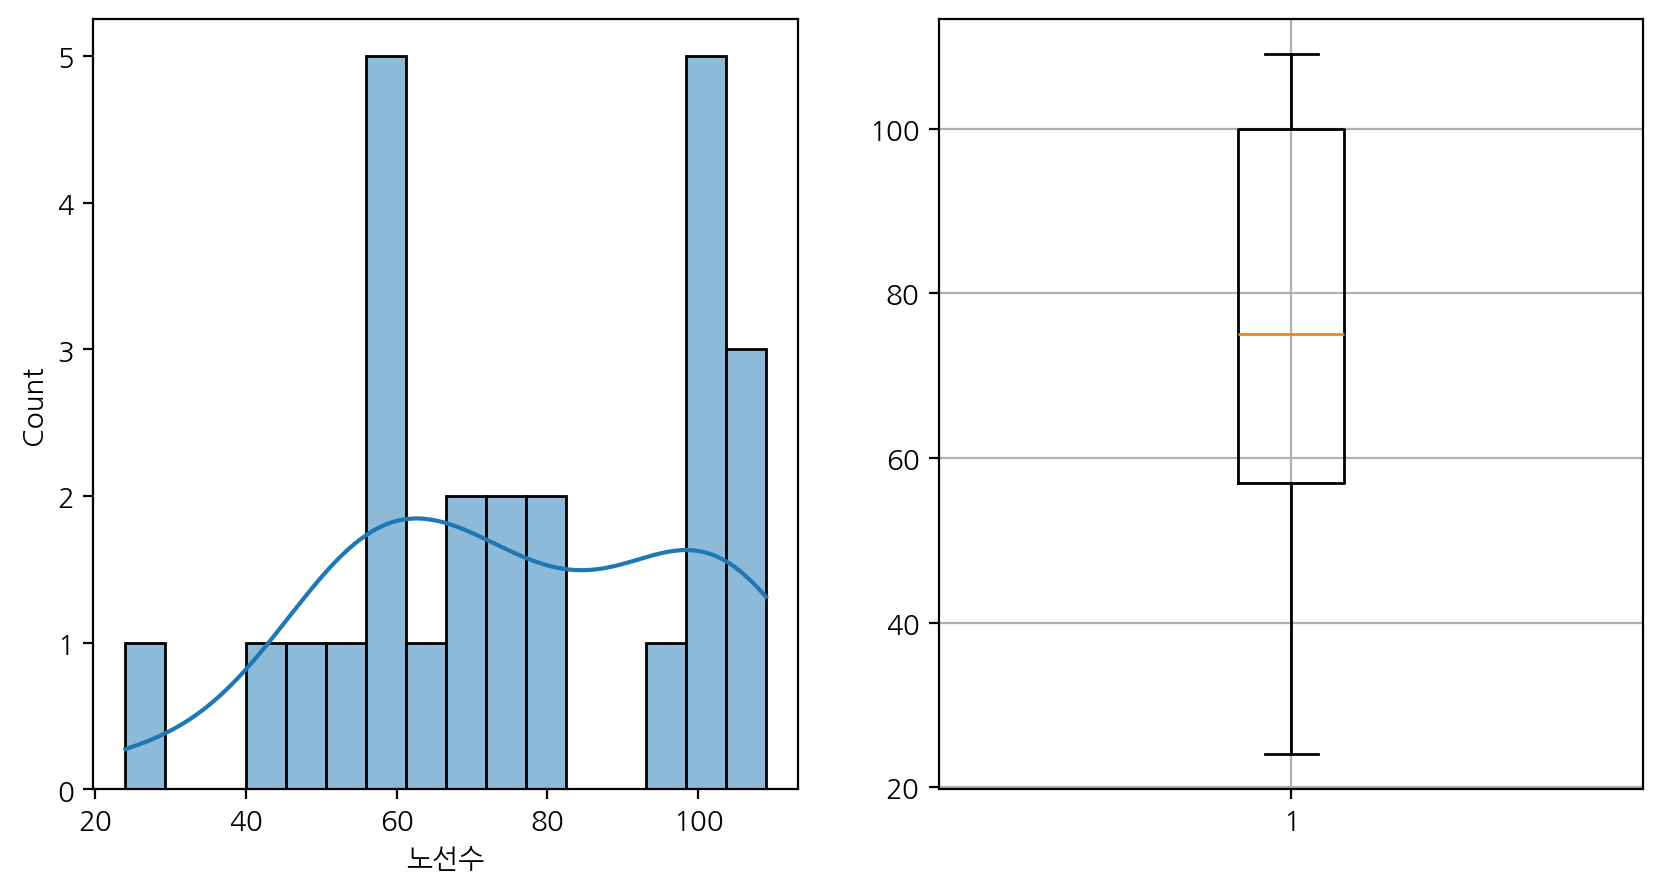

In [365]:
# 단변량 시각화
print_graph('노선수')

In [444]:
# 단변량 기초 수치
basic_stats('노선수')

노선수의 기초 통계량
평균:75.84
최대:109
최소:24
표준편차:23.012483568706788
q1: 57.0
q2: 75.0
q3: 100.0
q4: 109.0


## 노선수 분석
* 평균은 75.84 이지만, 최소값이 24로 차이가 크다.
* 자치구별로 노선수의 분산이 크다(노선이 밀집된 곳이 있다.)

### 2) 택시운송업

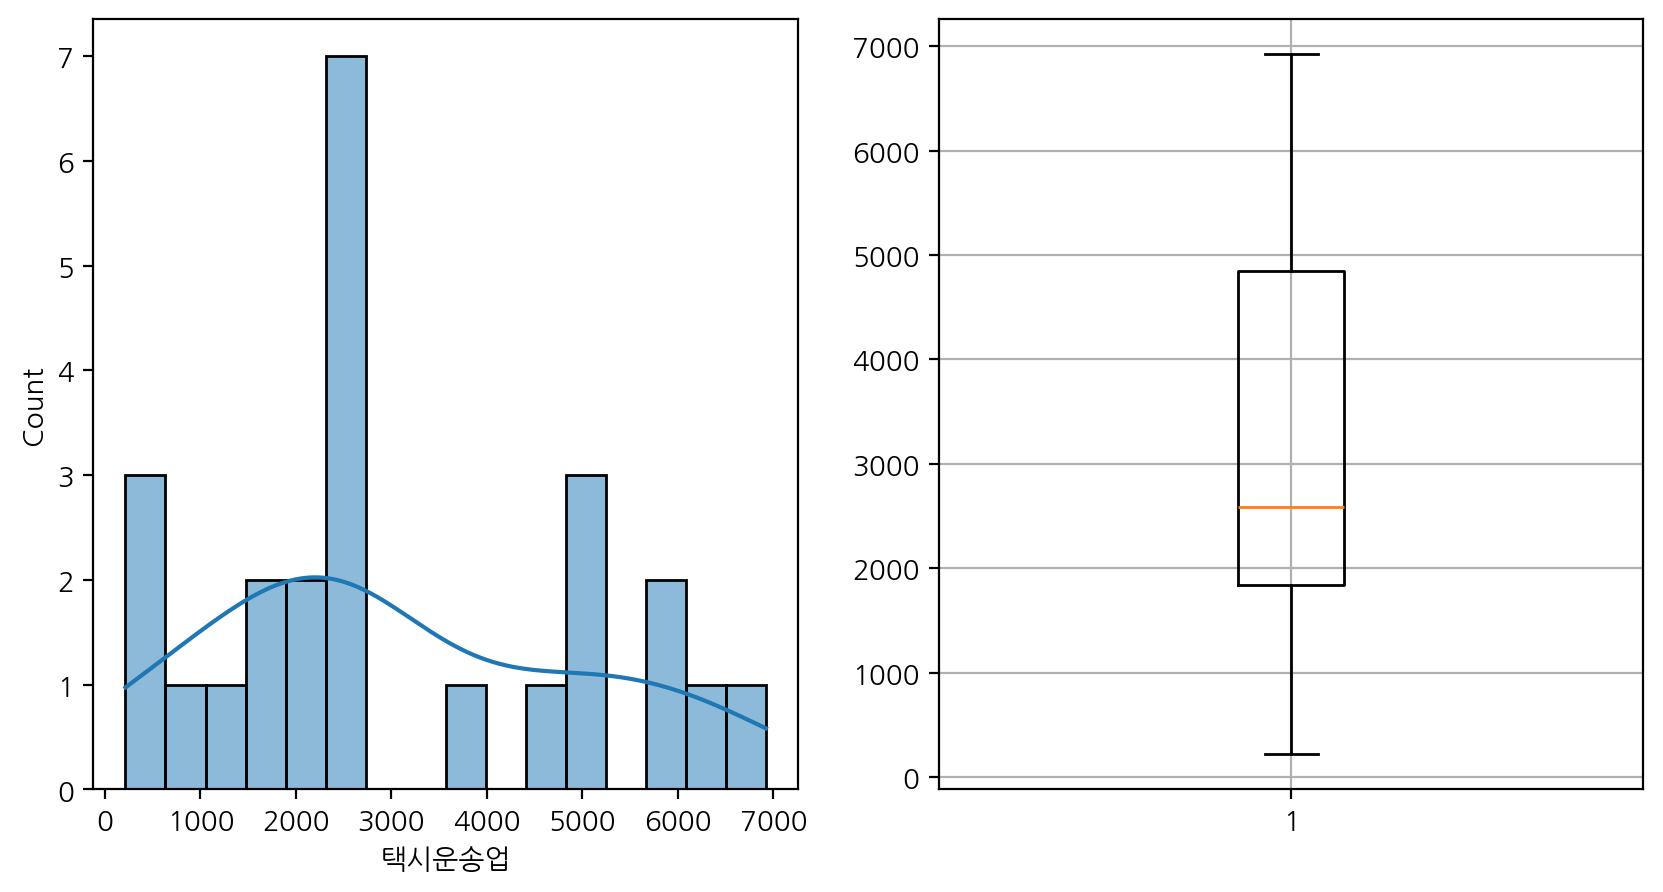

In [447]:
# 단변량 시각화
print_graph('택시운송업')

In [451]:
# 단변량 기초 수치
basic_stats('택시운송업')

택시운송업의 기초 통계량
평균:3068.04
최대:6922
최소:215
표준편차:1923.4958898838331
q1: 1838.0
q2: 2589.0
q3: 4850.0
q4: 6922.0


## 택시운송업 분석
* 최대, 최소의 차이가 6707로 매우 크다.
* 자치구별로 택시운송업의 분산이 크다(택시운송업이 밀집된 곳이 있다.)

### 3) 총 이동인구

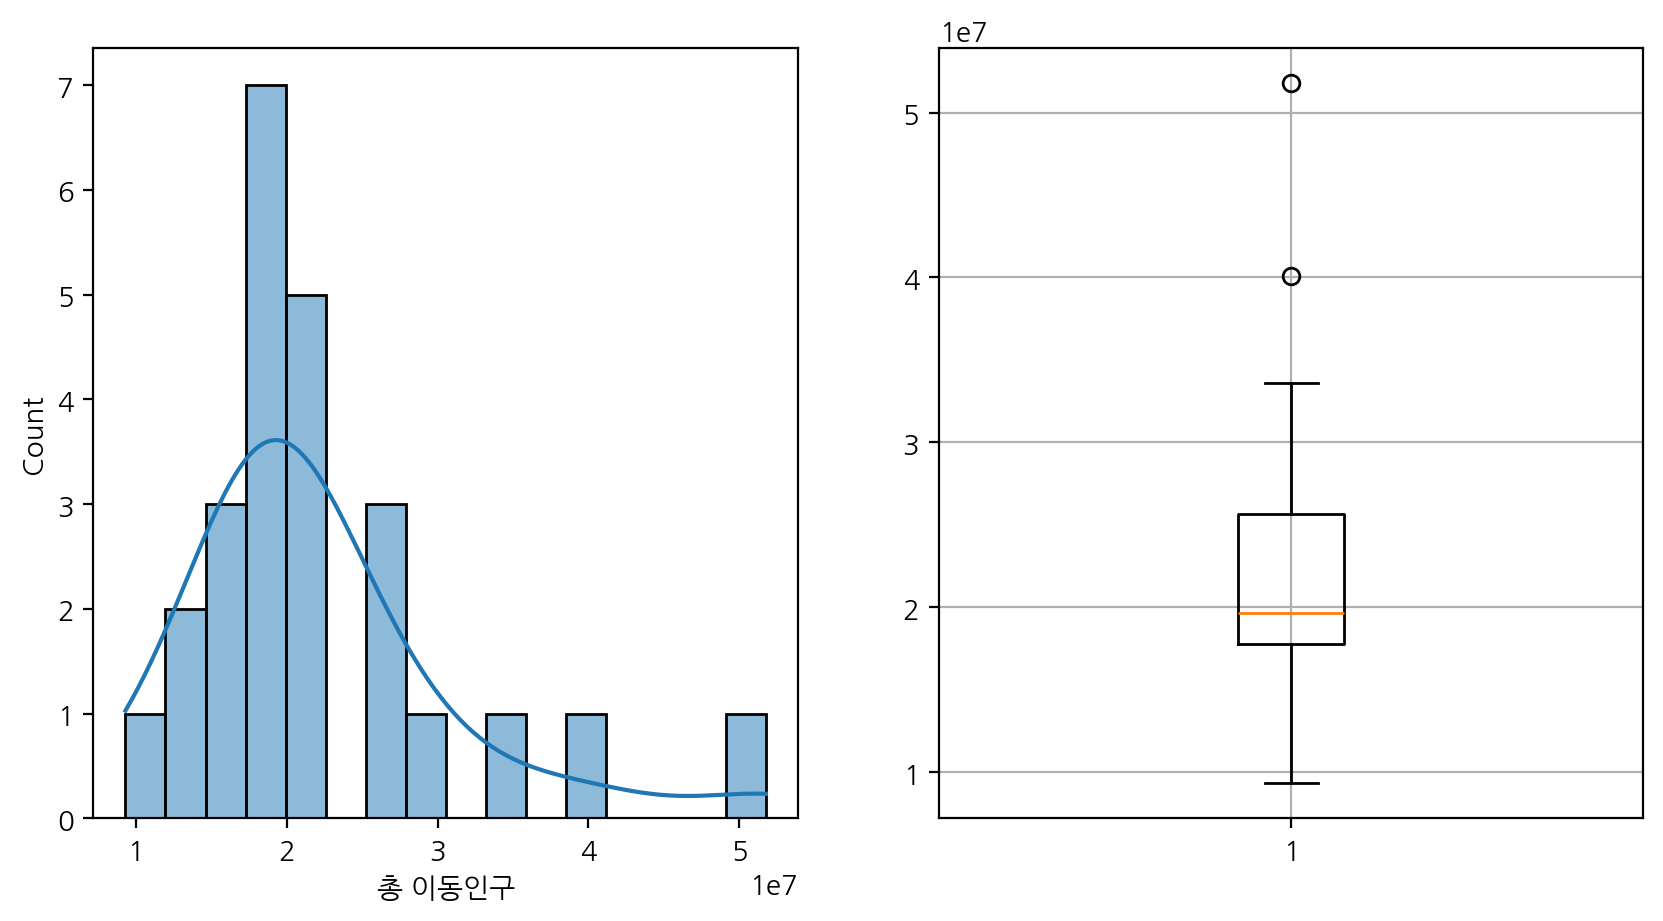

In [418]:
# 단변량 시각화
print_graph('총 이동인구')

In [456]:
# 단변량 기초 수치
basic_stats('총 이동인구')

총 이동인구의 기초 통계량
평균:22192751.4848
최대:51766253.76
최소:9314767.58
표준편차:8796000.346846757
q1: 17755257.26
q2: 19652113.55
q3: 25664489.79
q4: 51766253.76


## 총 이동인구 분석
* 이상치가 존재한다.
* 분포가 비대칭이다.

### 4) 한식 육류요리 전문점

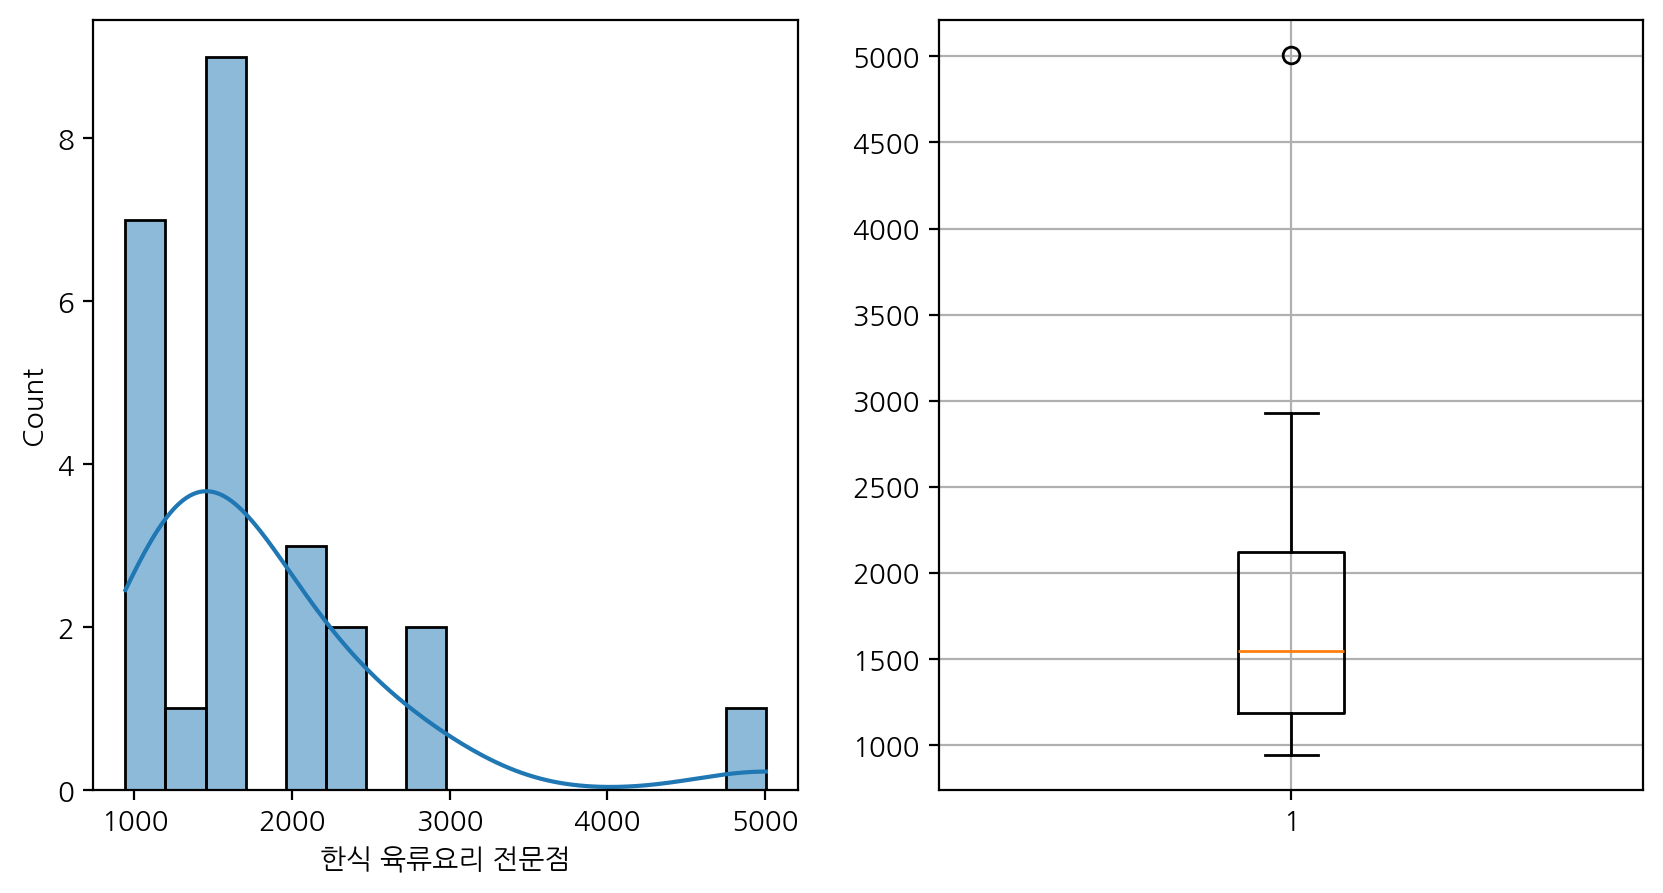

In [461]:
# 단변량 시각화
print_graph('한식 육류요리 전문점')

In [463]:
# 단변량 기초 수치
basic_stats('한식 육류요리 전문점')

한식 육류요리 전문점의 기초 통계량
평균:1786.12
최대:5008
최소:943
표준편차:837.4946122811775
q1: 1184.0
q2: 1545.0
q3: 2121.0
q4: 5008.0


## 한식 육류요리 전문 분석
* 이상치가 존재한다.
* 이상치를 제외하고는 분산이 적다.

### 5) 총 승객수

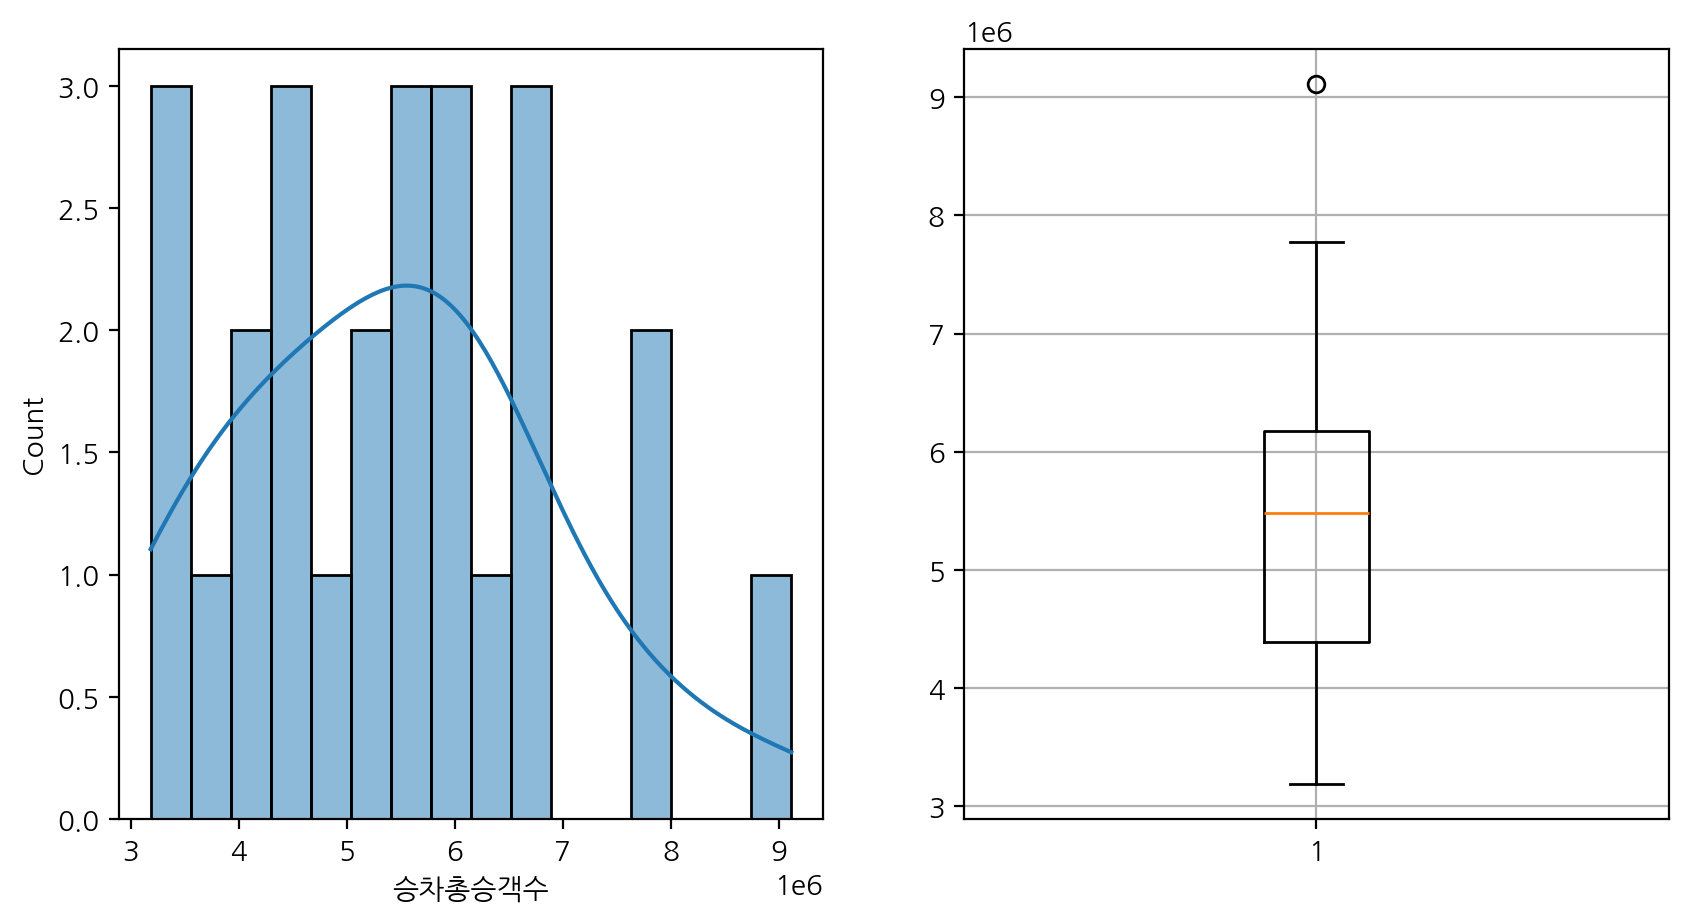

In [468]:
# 단변량 시각화
print_graph('승차총승객수')

In [470]:
# 단변량 기초 수치
basic_stats('승차총승객수')

승차총승객수의 기초 통계량
평균:5421663.2
최대:9113021
최소:3185165
표준편차:1478189.072966811
q1: 4384564.0
q2: 5483153.0
q3: 6172655.0
q4: 9113021.0


## 한식 육류요리 전문 분석
* 이상치가 존재한다.

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

In [309]:
# 상관계수 계산
from scipy.stats import pearsonr

In [535]:
# 숫자 -> 숫자 이변량 분석 함수
def bivariate_analysis(column1, column2):
    # 수치화: 상관계수 계산
    correlation, p_value = pearsonr(df[column1], df[column2])
    print(f"'{column1}'와 '{column2}'의 상관계수: {correlation:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # 시각화: 산점도 및 회귀선 
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(x=df[column1], y=df[column2], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"'{column1}'와 '{column2}'의 산점도 및 회귀선")
    plt.xlabel(column1)
    plt.ylabel(column2)
    # 데이터 라벨링
    for i in range(len(df)):
            ax.text(df[column1].iloc[i] - 6, df[column2].iloc[i] - 3, df['자치구'].iloc[i], fontsize=8)

    plt.show()


### 1) 가설 1: 택시운송업이 많은 곳은 노선수가 적다.

'택시운송업'와 '노선수'의 상관계수: -0.6236
p-value: 0.00086642


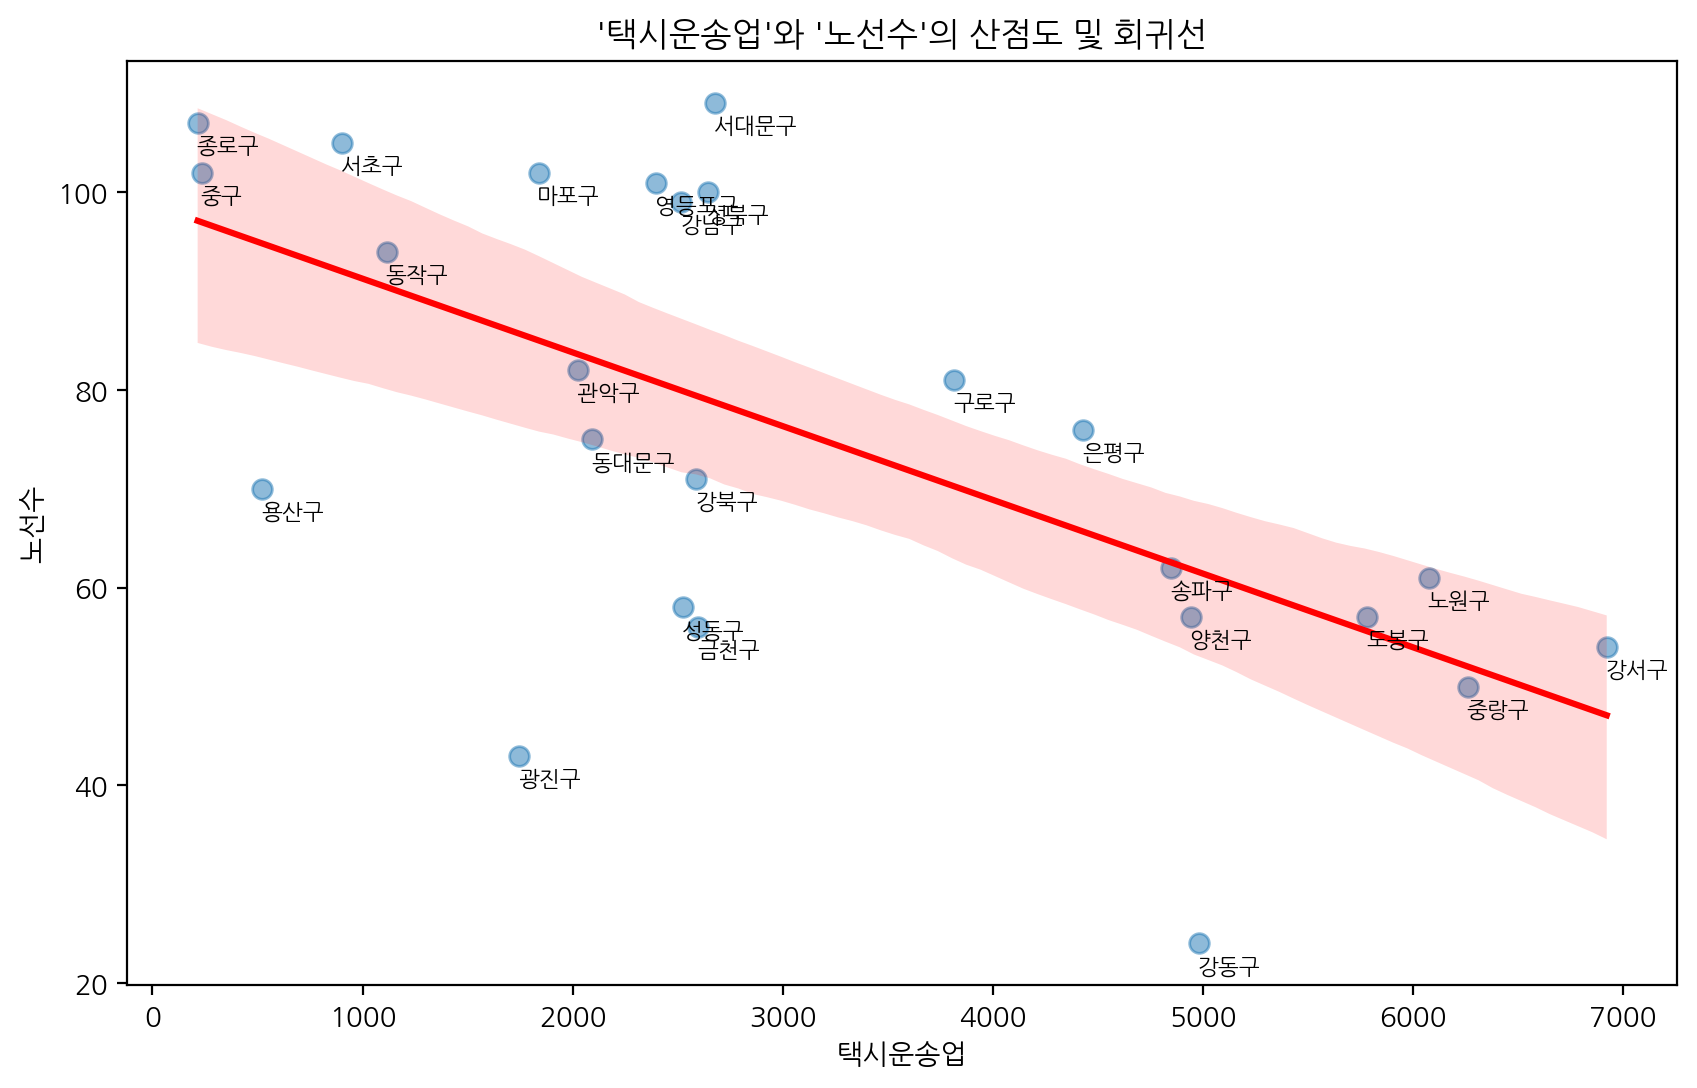

In [507]:
bivariate_analysis('택시운송업', '노선수')

### 이변량 분석 결과
'택시운송업'와 '노선수'의 상관계수는 -0.6236 이며, 
p-valu는: 0.000 상관관계가 있다.9

### 2) 가설 2: 택시운송업이 많은 지역은 승차 평균 승객수가 적다.

'택시운송업'와 '승차평균승객수'의 상관계수: -0.7719
p-value: 0.00000621


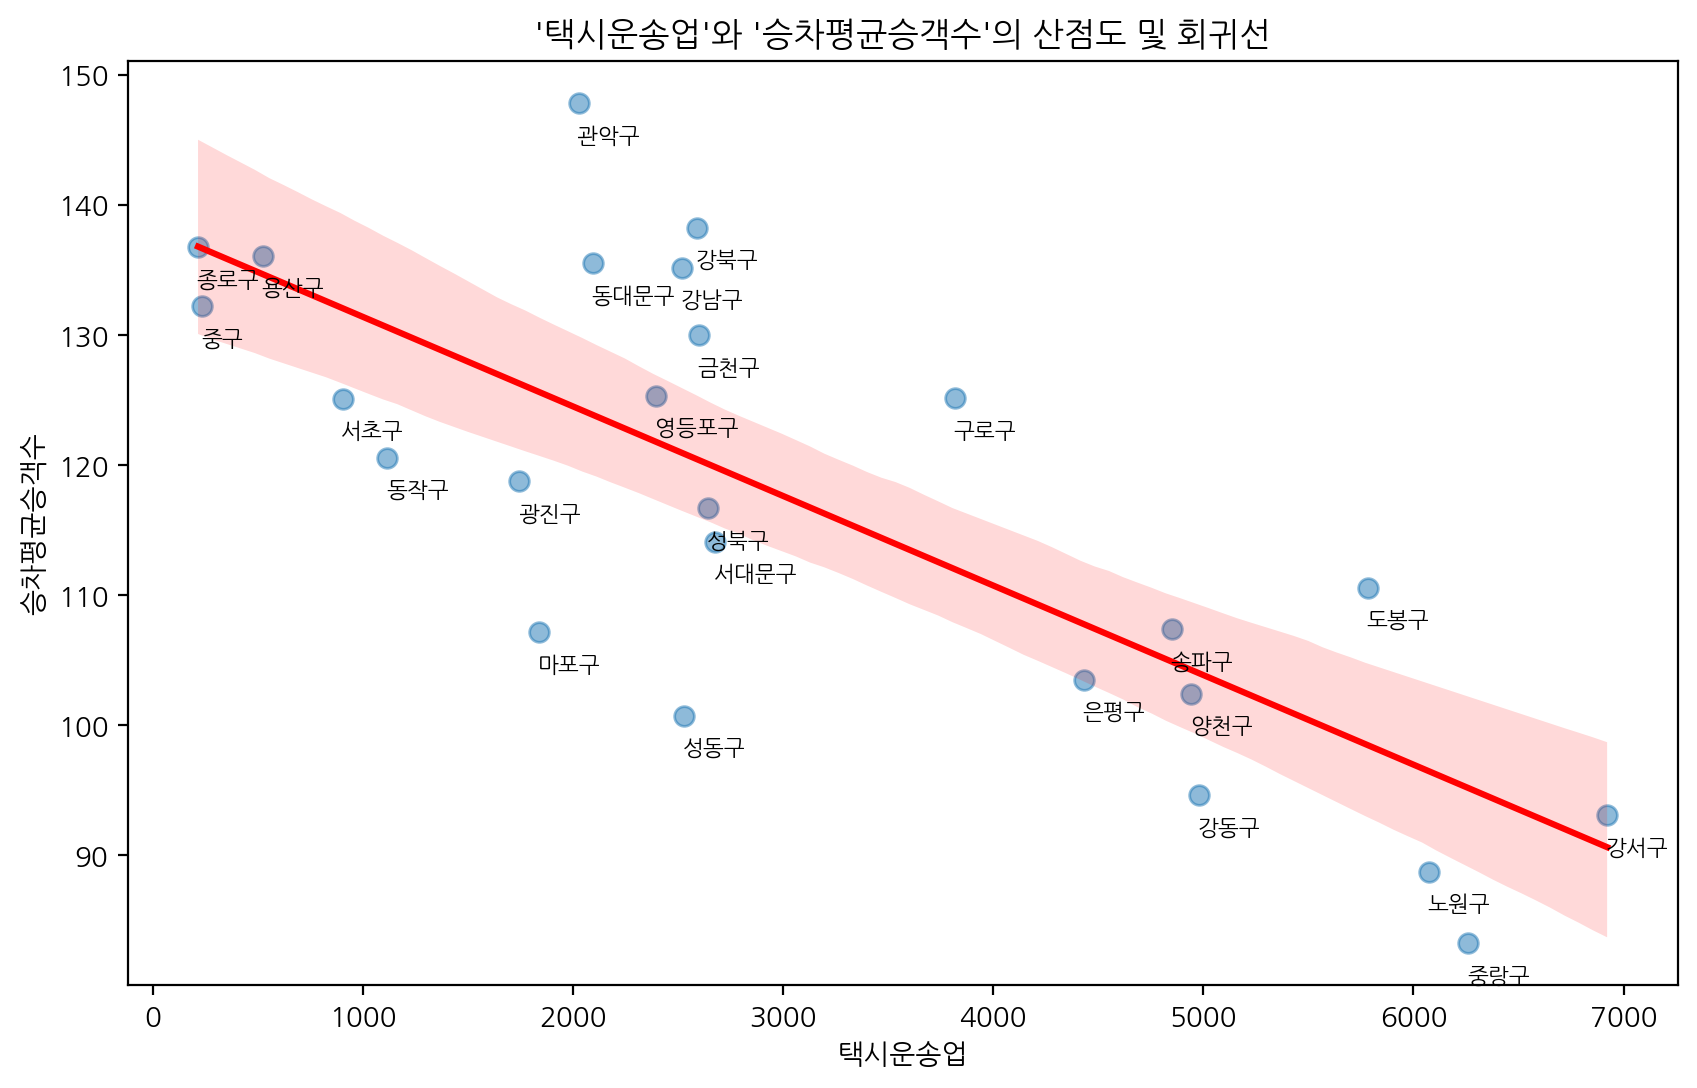

In [509]:
bivariate_analysis('택시운송업', '승차평균승객수')

### 이변량 분석 결과
'택시운송업'와 '승차평균승객수'의 상관계수는 -0.7719 이며, p-value는 0.0000 음의 상관관계가 있다.

### 3) 가설 3: 승차평균승객수가 많으면 노선수가 많다.

'승차평균승객수'와 '노선수'의 상관계수: 0.5129
p-value: 0.00874799


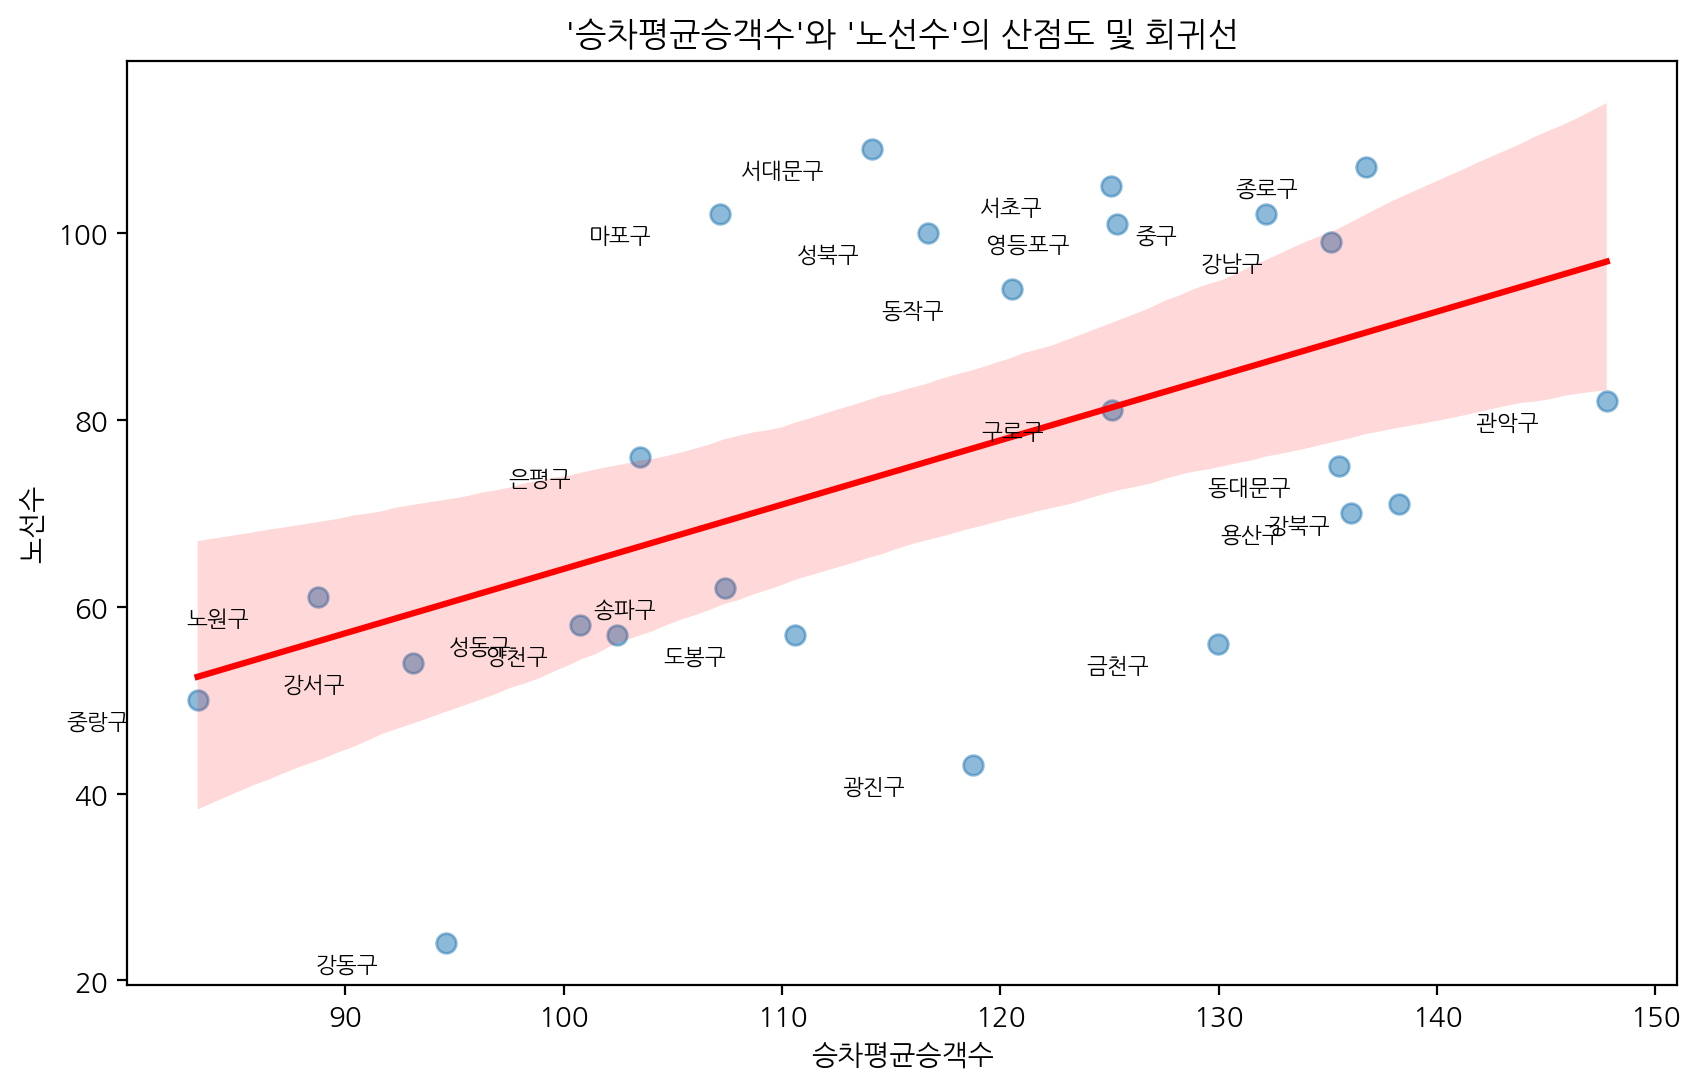

In [513]:
bivariate_analysis('승차평균승객수', '노선수')

### 이변량 분석 결과
'승차평균승객수'와 '노선수'의 상관계수는 0.5129 이며, p-value는 0.0087 상관관계가 있다.

### 4) 가설 4: 한식 육류 전문점은 한식 일반 음식점, 부동산 중개 및 대리업, 두발미용, 커피전문점과 관계가 있으며, 이들 간의 상관관계는 대표성을 가진다

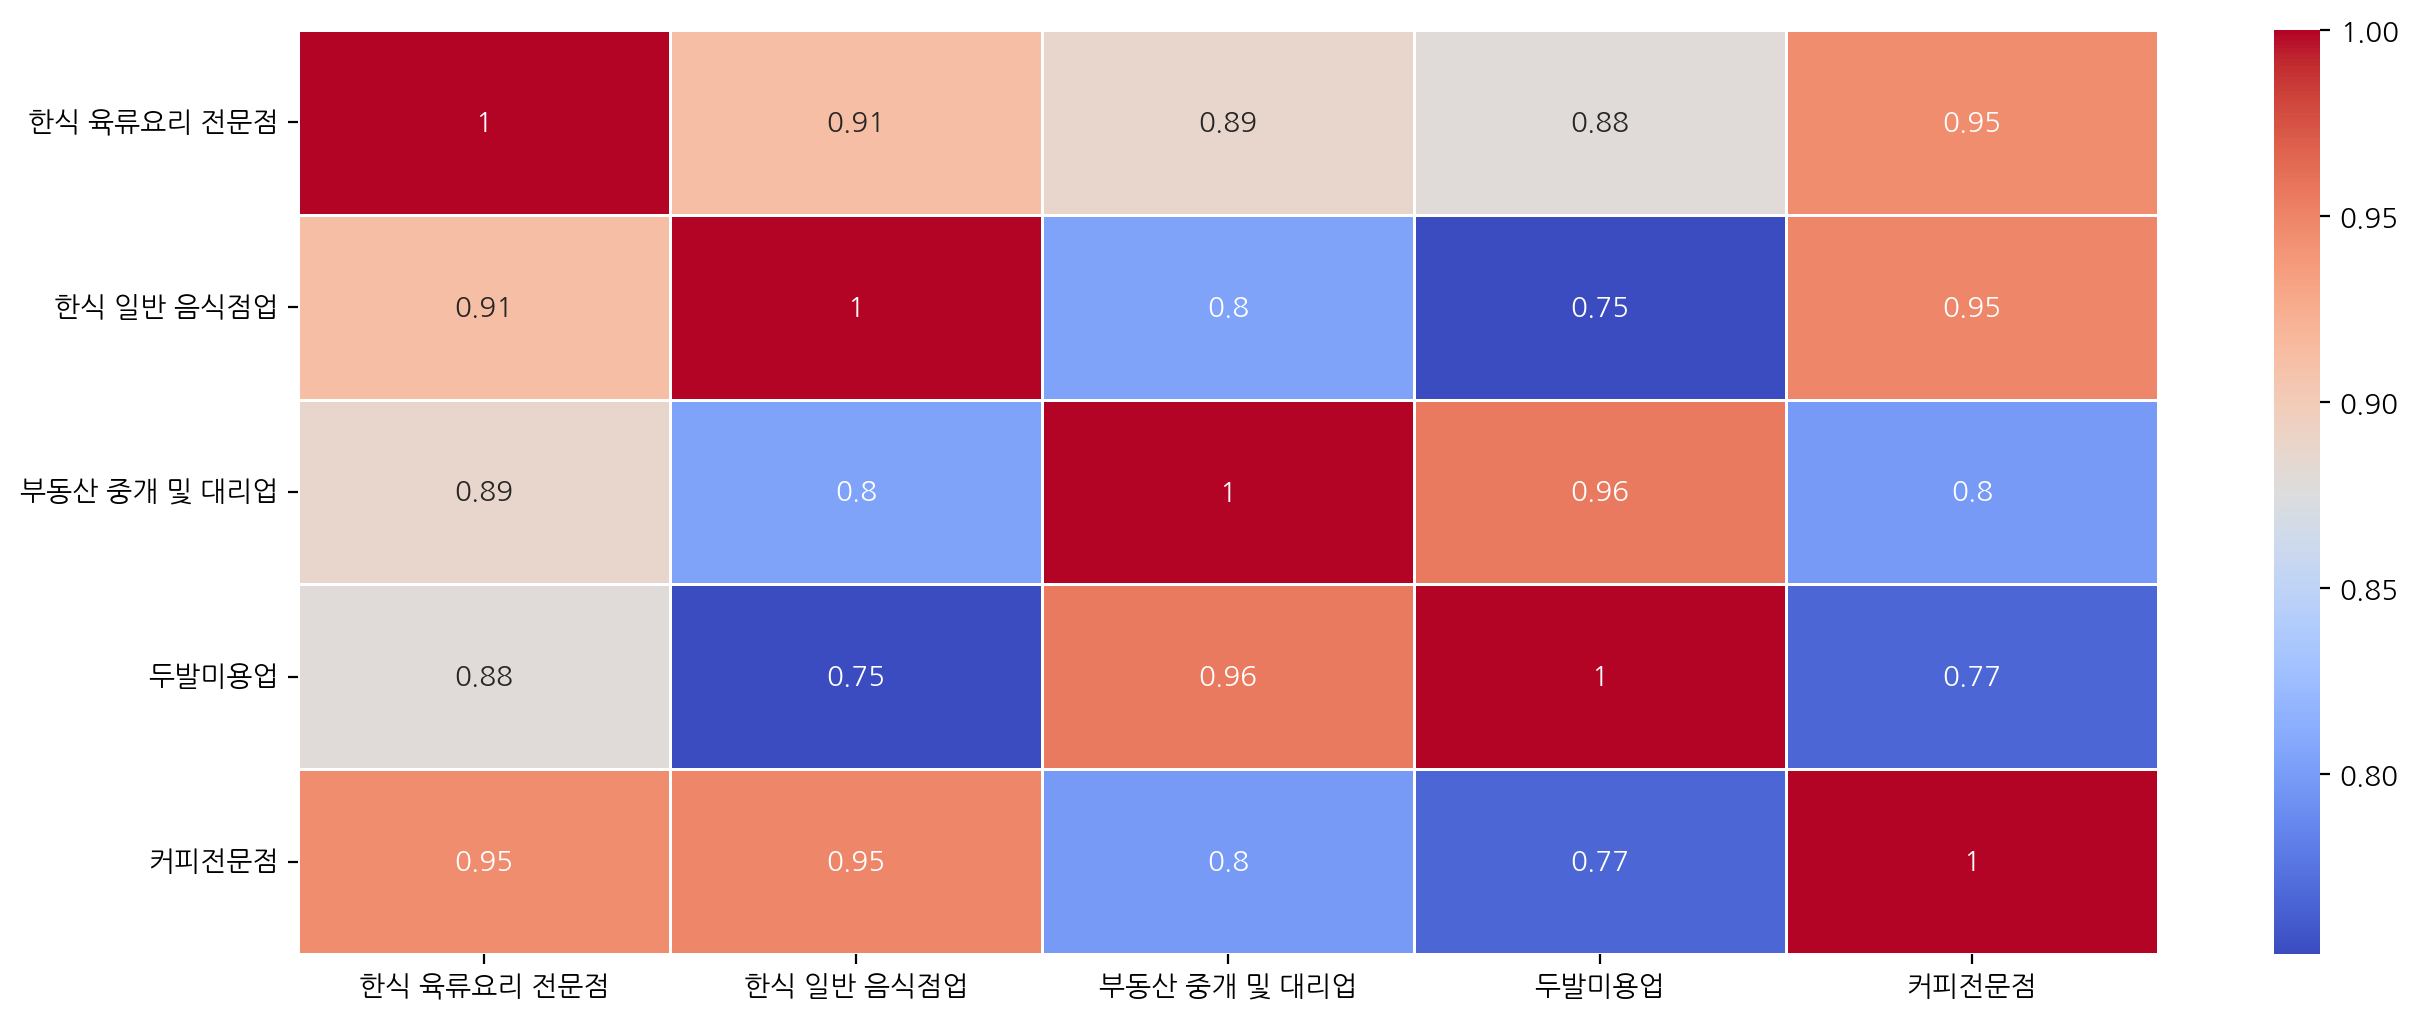

In [498]:
# 한식 육류요리 전문점과 관련있는 업종 선택
# '한식 일반 음식점업, 부동산 중개 및 대리업, 두발미용업, 커피전문점, 기타주점업'과 관련이 있다.

corr_matrix = df.iloc[:, 12:17].corr()

# 히트맵 그리기
plt.figure(figsize=(15, 6))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

## 이변량 분석 결과
* 여러 업종 비교 결과 한식 육류요리 전문점이 한식 일반 음식점업, 부동산 중개 및 대리업, 두발미용업, 커피전문점과 매우 높은 상관관계(0.88이상)의 수치를 보인다.
* 따라서, 한식 육류요리 전문점은 대표성을 가진다.

### 5) 가설 5: 한식육류요리 전문점은 총이동인구와 관련이 있다.

'한식 육류요리 전문점'와 '총 이동인구'의 상관계수: 0.9147
p-value: 0.0000


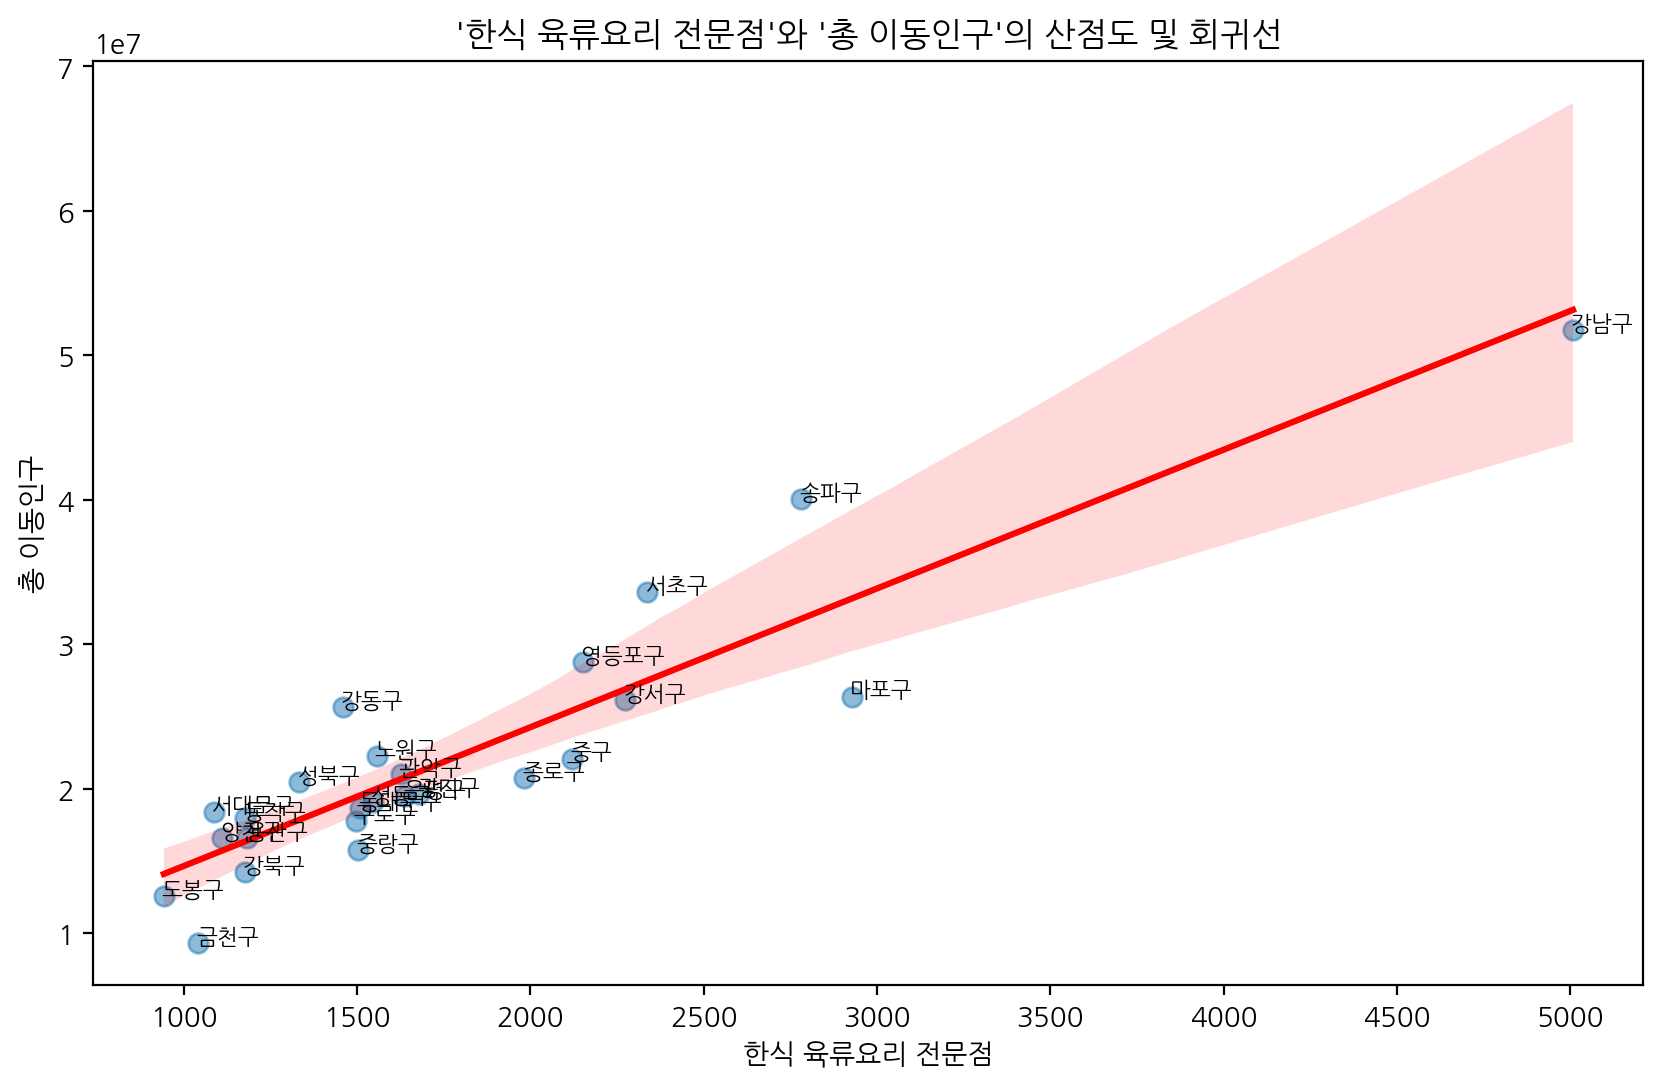

In [537]:
bivariate_analysis('한식 육류요리 전문점', '총 이동인구')

### 이변량 분석 결과
'한식 육류요리 전문점'와 '총 이동인구'의 상관계수는 0.9147 이며, p-value는 0.0000 상관관계가 있다.

### 6) 가설 6: 총이동인구 수는 총 승객수와 관련이 있다.

'총 이동인구'와 '승차총승객수'의 상관계수: 0.6315
p-value: 0.0007


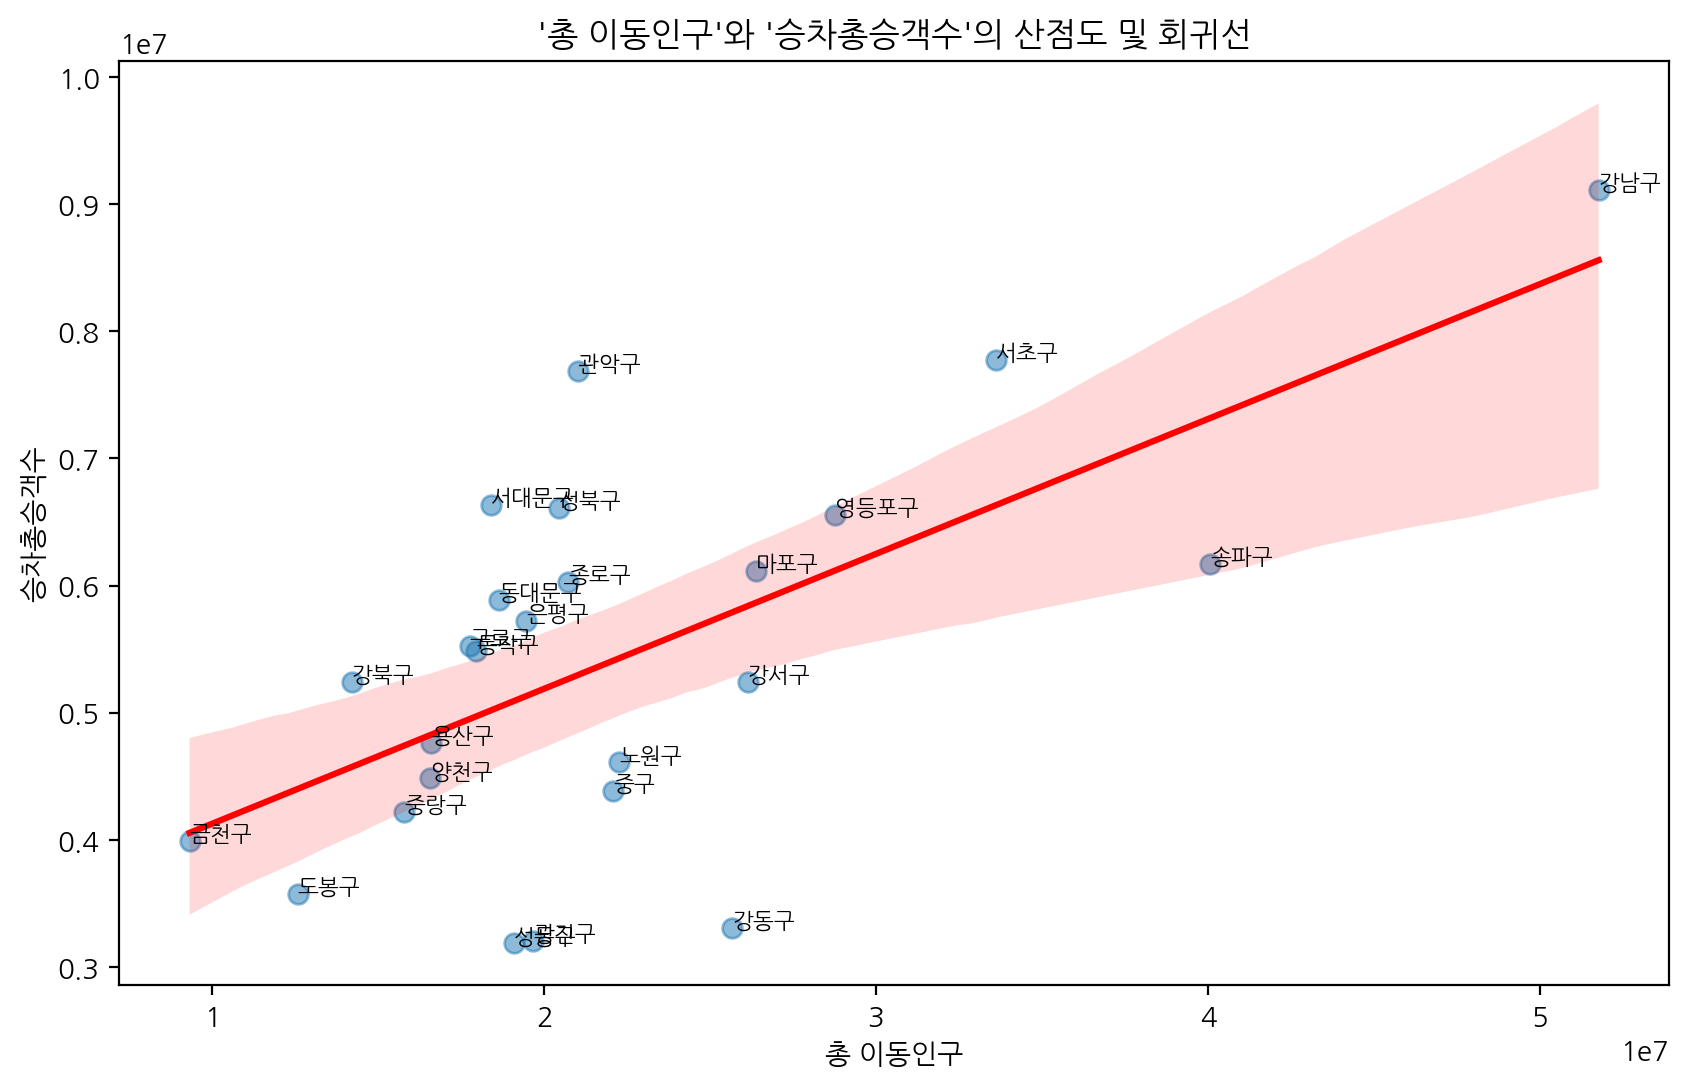

In [542]:
bivariate_analysis('총 이동인구', '승차총승객수')

### 이변량 분석 결과
'총 이동인구'와 '승차총승객수'의 상관계수는 0.6315 이며, p-value는 0.0007 상관관계가 있다.

### HeatMap으로 시각화

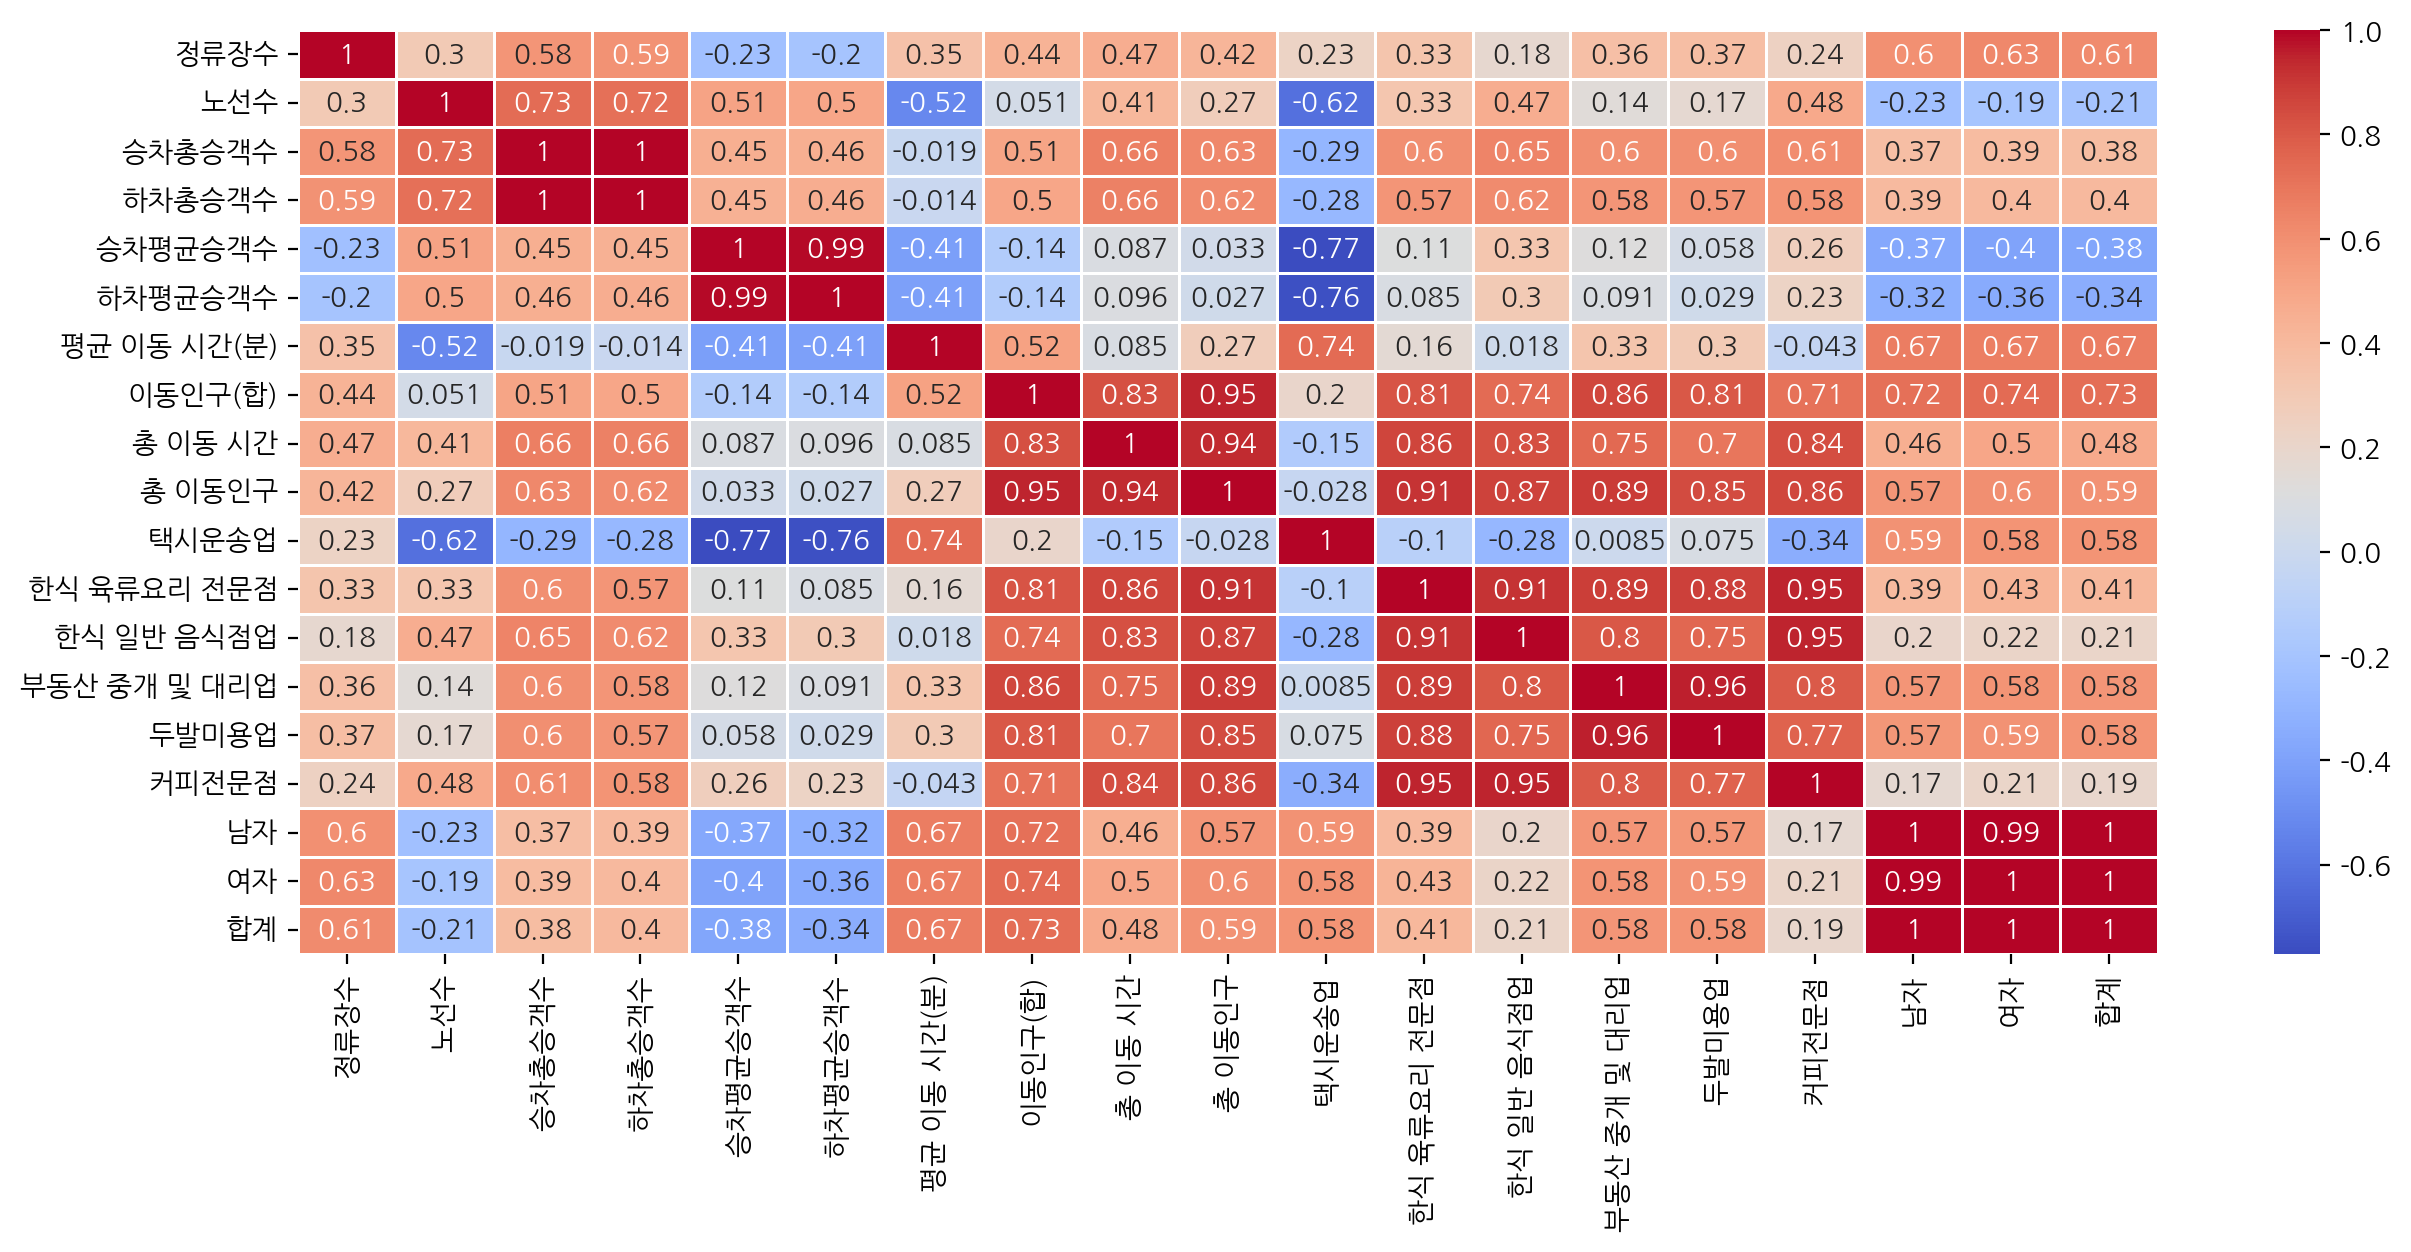

In [338]:
# 1번째부터 7번째 열의 상관계수
corr_matrix = df.iloc[:, 1:].corr()

# 히트맵 그리기
plt.figure(figsize=(15, 6))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

# 6. 관계 정리

### 1) '노선수'와 강한 관계의 열
* 총 승객수
* 평균 승객수
* 평균 이동시간
* 이동인구
* 택시운송업

### 2) '노선수'와 중간 관계의 열
* 정류장수
* 총 이동시간
* 총 이동인구
* 한식육류요리전문점
* 한식일반음식점
* 남자
* 합계

### 3) 결론
* 가설 1~6은 타당성이 있다.
* 결론1: 가설 1~3의 택시운송업이 많은 곳에 노선을 추가하지 않는다.
* 결론2: 가설 4~6의 한식 육류요리 전문점이 많은 곳에 노선을 추가한다.
* **즉, 결론 1에 따라 택시 운송업이 적고 결론 2에 따라 한식 육류요리 전문점이 많은 곳에 노선을 추가한다.**

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

In [623]:
# 분석 그래프 출력
def sol_graph(col_name):
    # 자치구별 데이터 시각화
    plt.figure(figsize=(14, 7))
    
    # 총 이동인구 막대 그래프
    sns.barplot(x='자치구', y=col_name, data=df, color='orange', label=col_name, alpha=0.6)
    plt.axhline(df[col_name].mean(), color = 'r')
    plt.title('자치구별 ' + col_name)
    plt.xlabel('자치구')
    plt.ylabel(col_name)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [625]:
def line_graph(col_name):
    # 자치구별 노선 및 변량 시각화
    plt.figure(figsize=(20,5))
    plt.plot(df['자치구'], df[col_name], color='red', linestyle="-", marker='o', label=col_name)
    plt.ylabel(col_name, color='red')  # Y축 레이블 추가
    
    ax2 = plt.gca().twinx()  # 현재 Axes의 twinx() 메서드를 사용하여 Y축 추가
    ax2.plot(df['자치구'], df['노선수'],color='blue', linestyle="-",marker='o',label='노선수')
    ax2.set_ylabel('노선수', color='blue')  # Y축 레이블 추가
    
    plt.title(col_name+'/노선수')
    plt.show()

### 1) 택시 운송업이 많은 곳은 노선수가 적고 따라서 택시 운송업이 많은 곳은 제외한다.

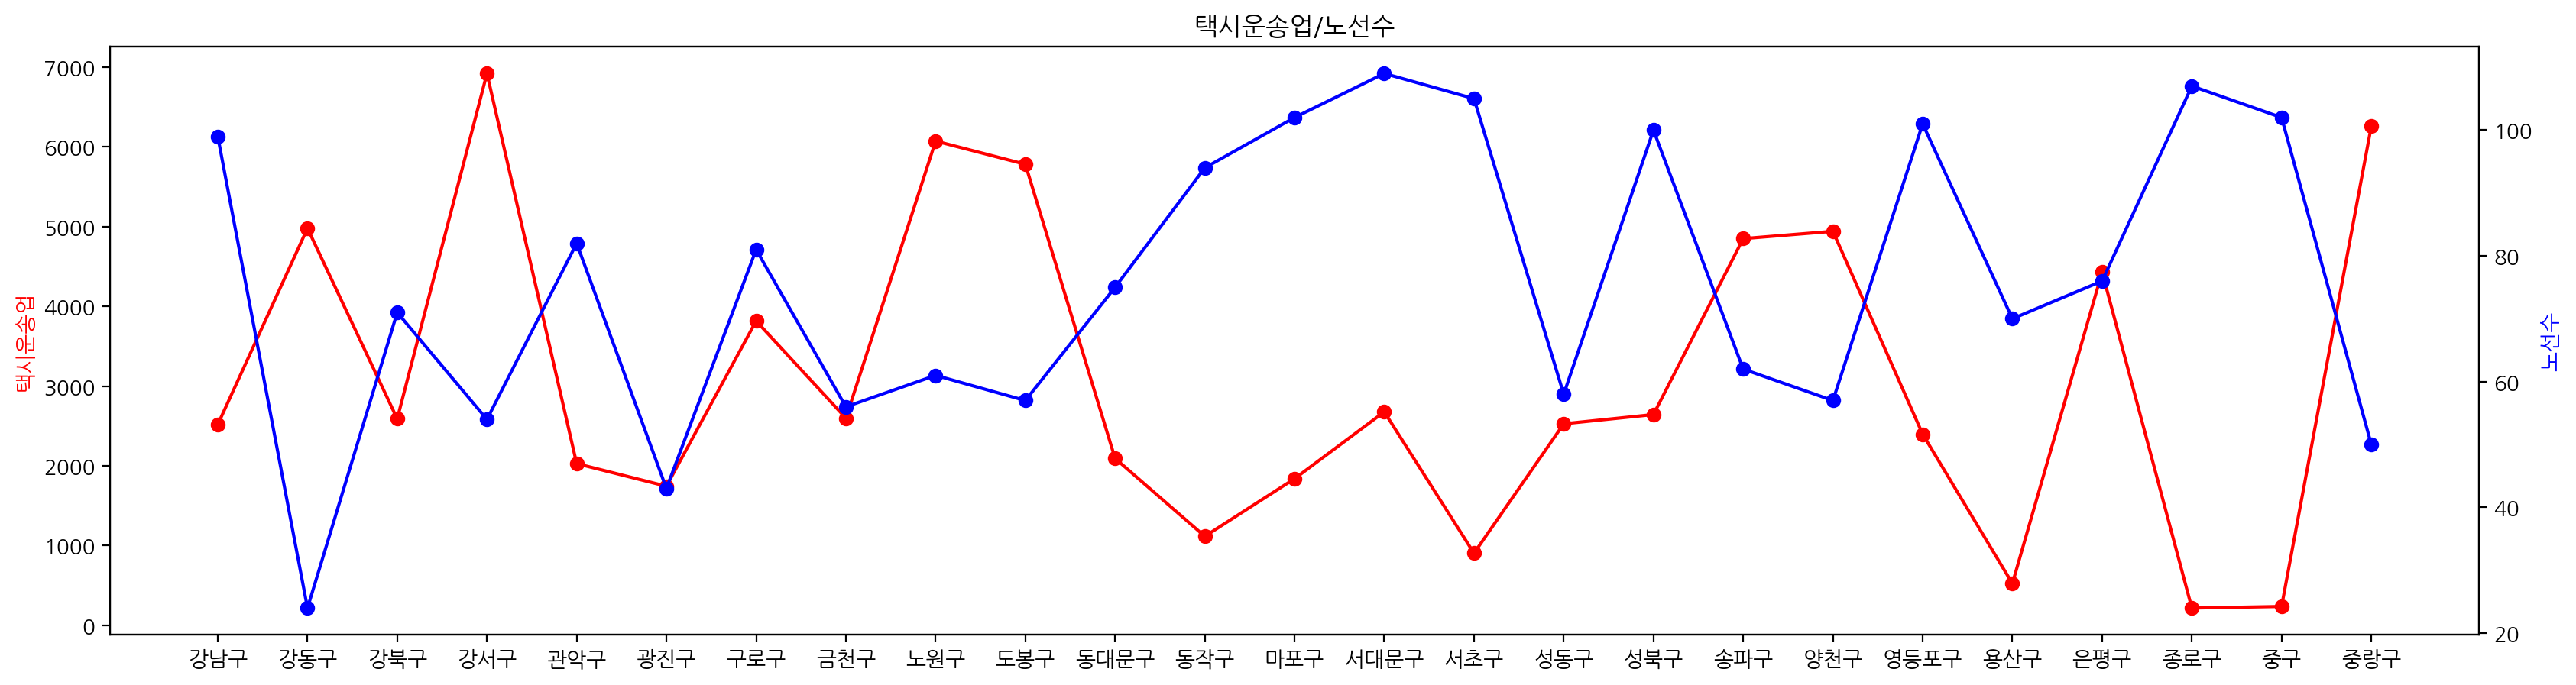

In [635]:
# 자치구별 택시운송업과 노선수 그래프
line_graph('택시운송업')

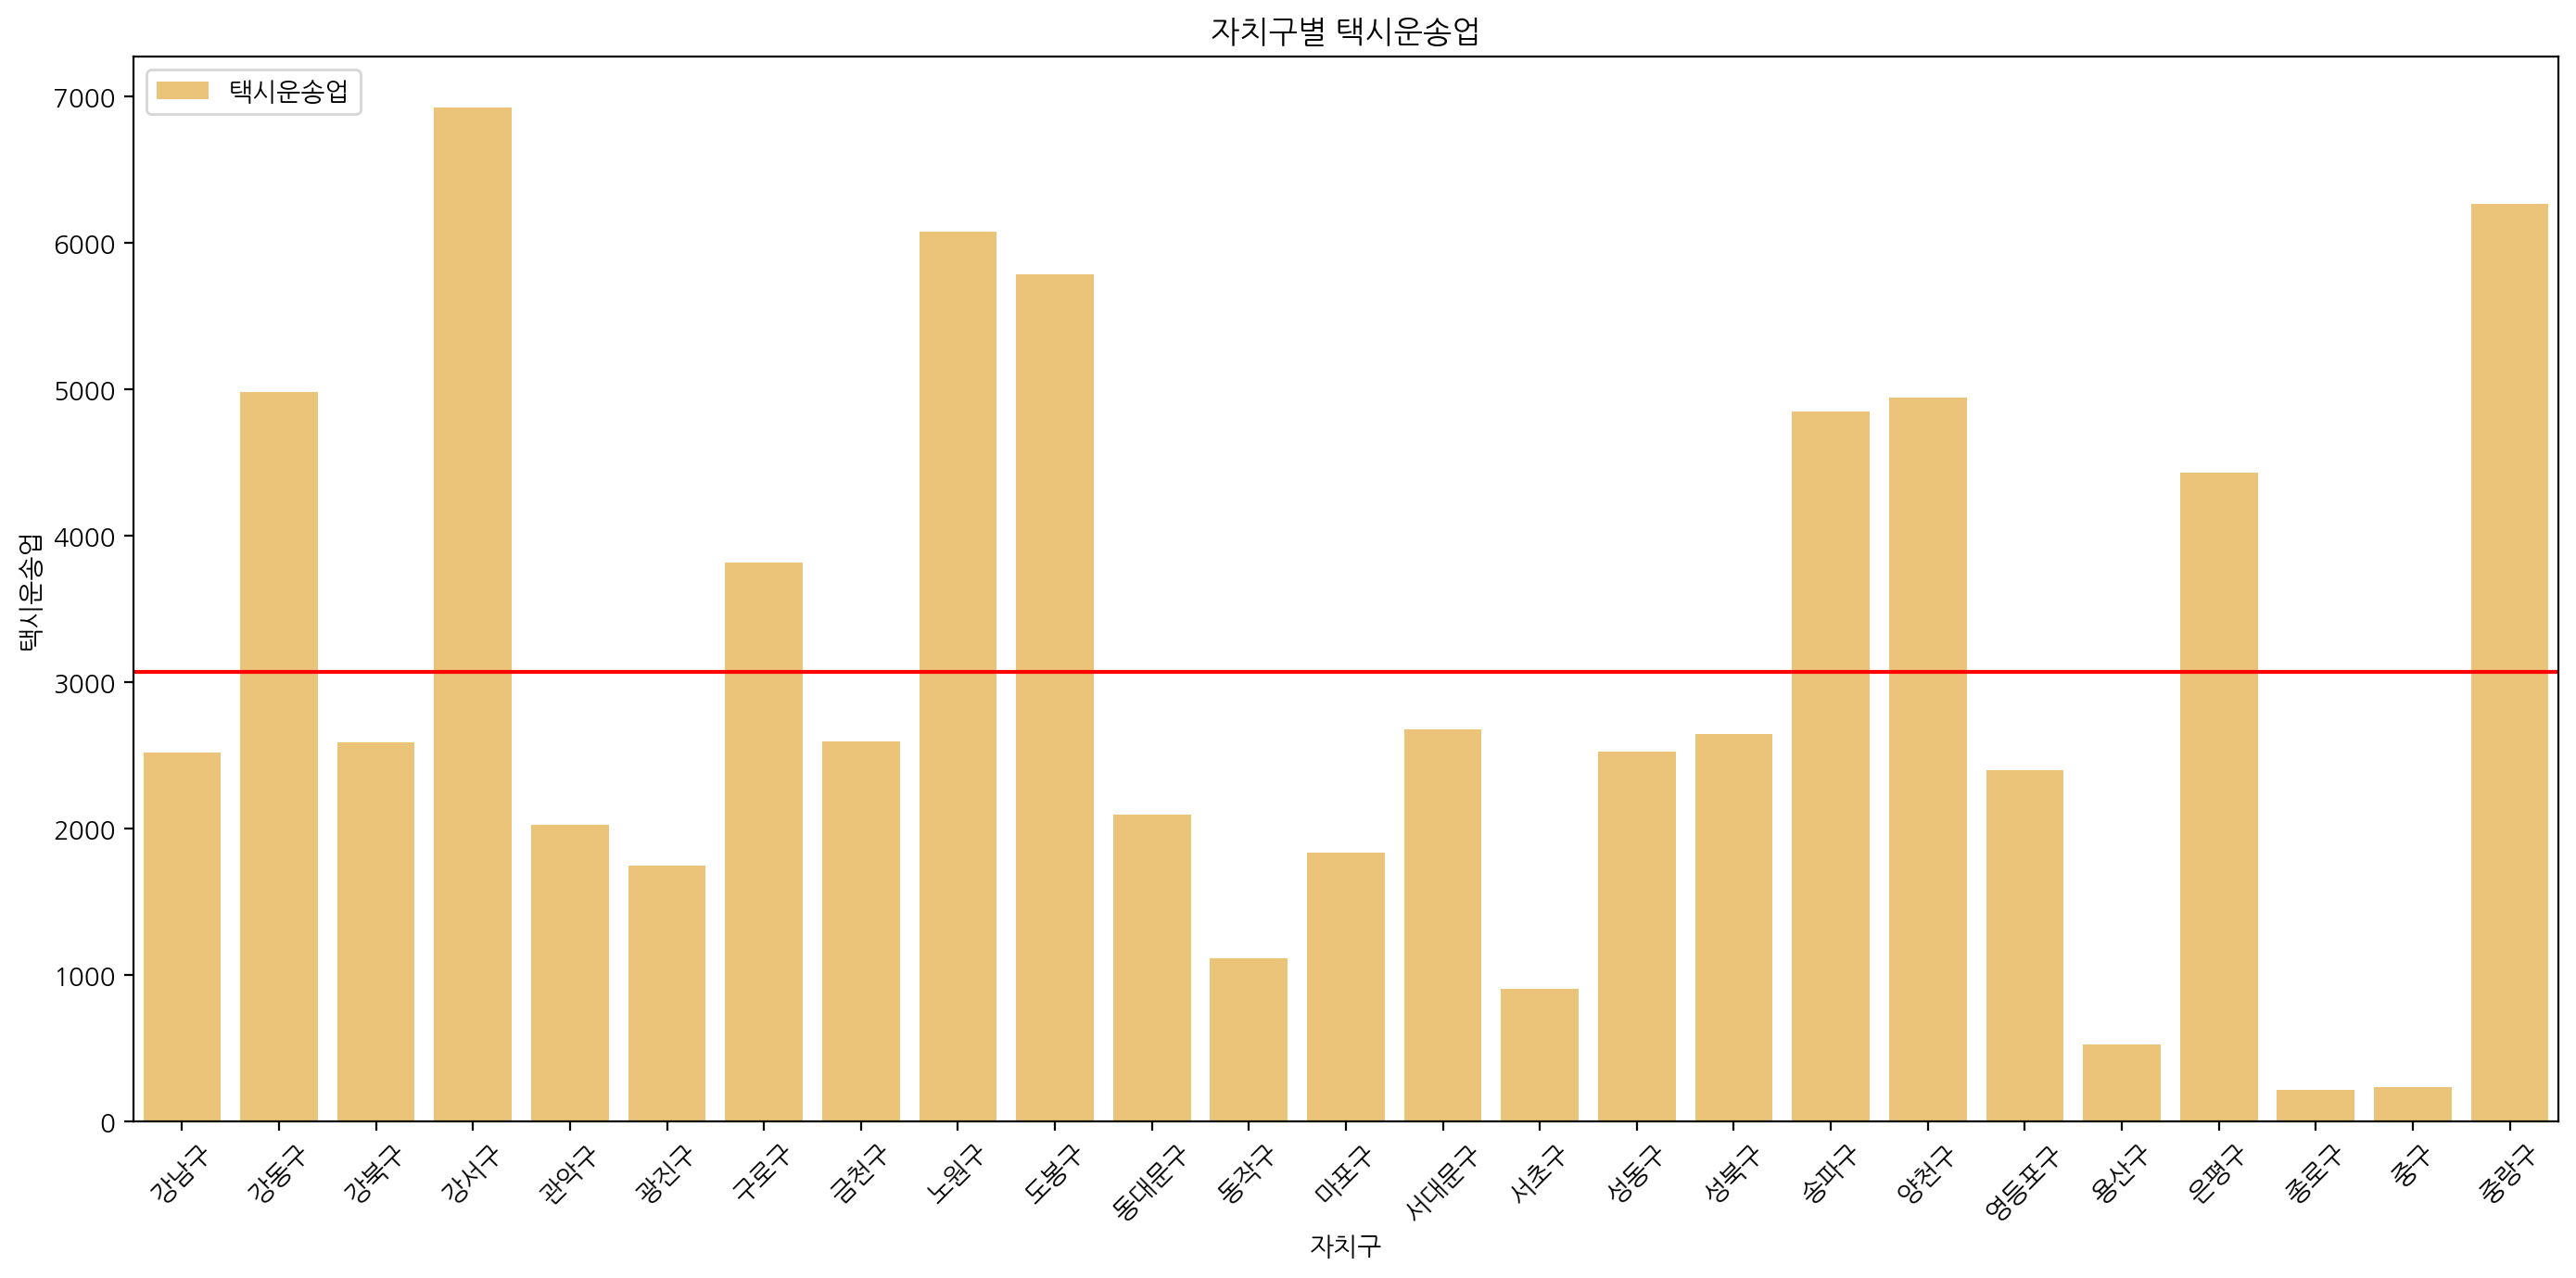

In [639]:
# 자치구별 택시 운송업 그래프
print_sol_graph('택시운송업')

### 분석1
* 택시 운송업이 적은 곳은 노선수가 많은 경향을 보인다.
* 그러므로, 택시 운송업이 많은 곳은 추가 노선에서 제외한다.
* 따라서, 강동구, 강서구, 노원구, 도봉구, 송파구, 양천구, 중랑구를 제외한다.
* 추가적으로 이미 노선수가 많은 강남구, 강북구, 관악구, 구로구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성북구, 영등포구, 종로구, 중구도 제외한다.

### 2) 한식 육류요리 전문점이 많고 노선수가 적은 곳에 노선을 추가한다.

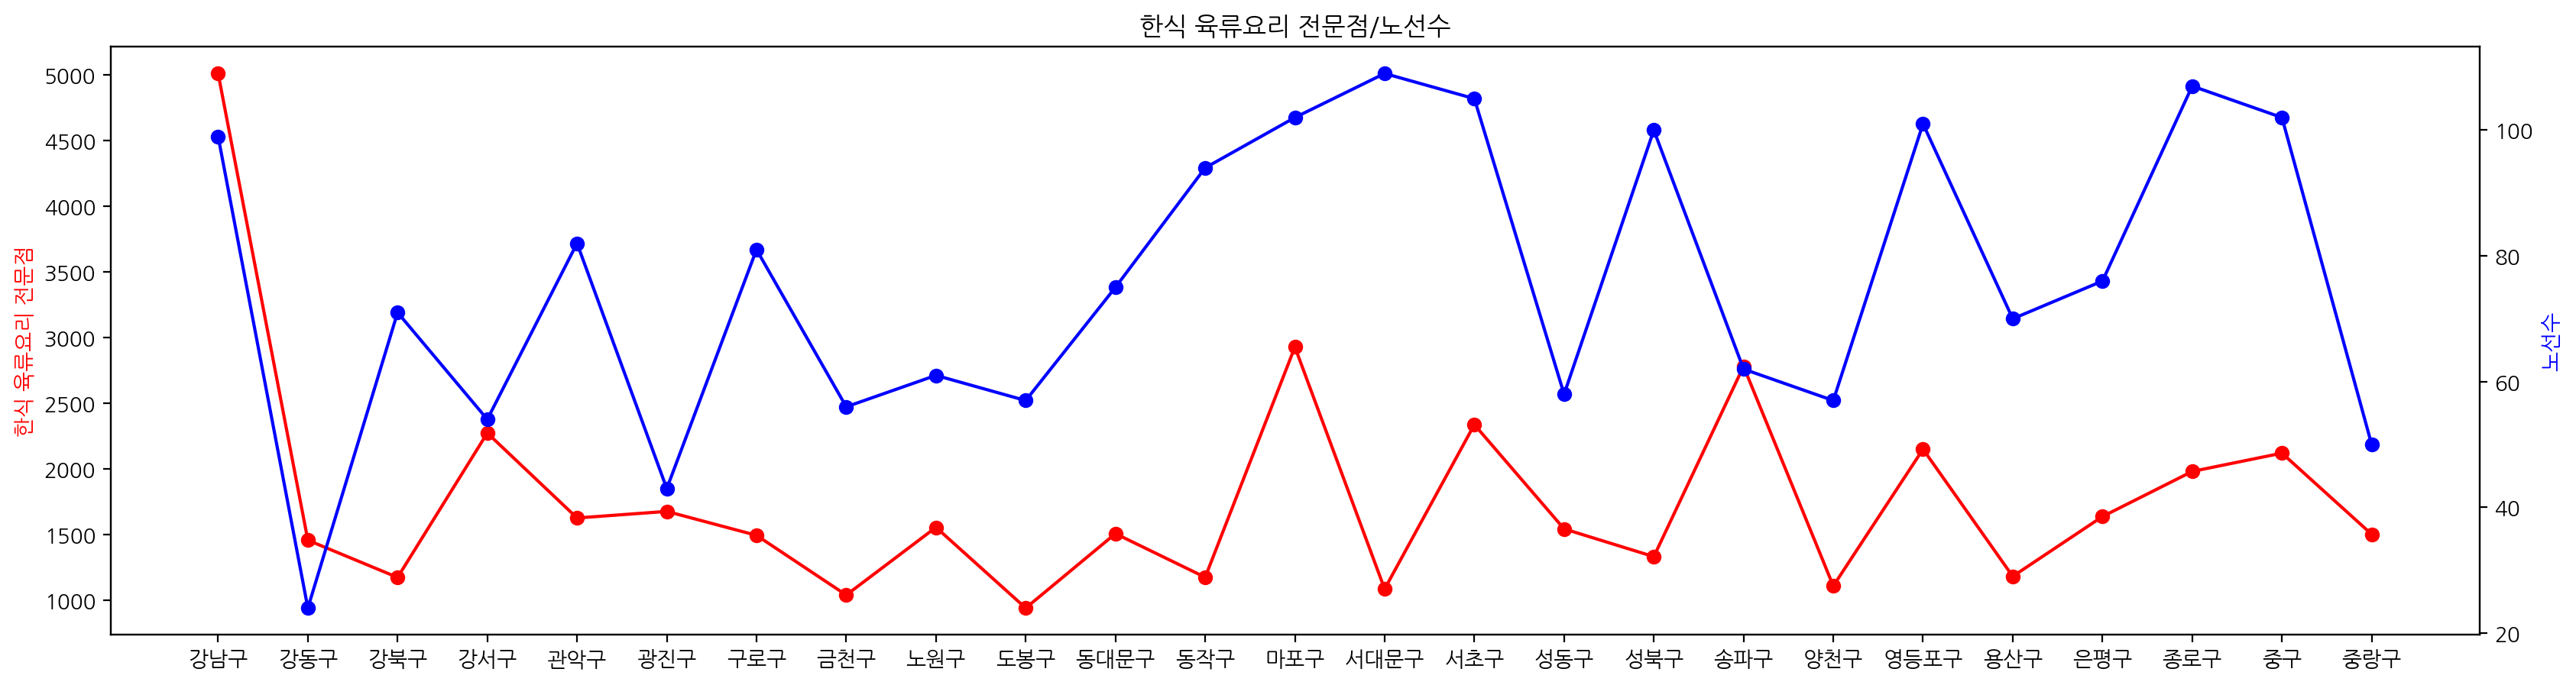

In [644]:
# 자치구별 한식 육류요리 전문점과 노선수 그래프
line_graph('한식 육류요리 전문점')

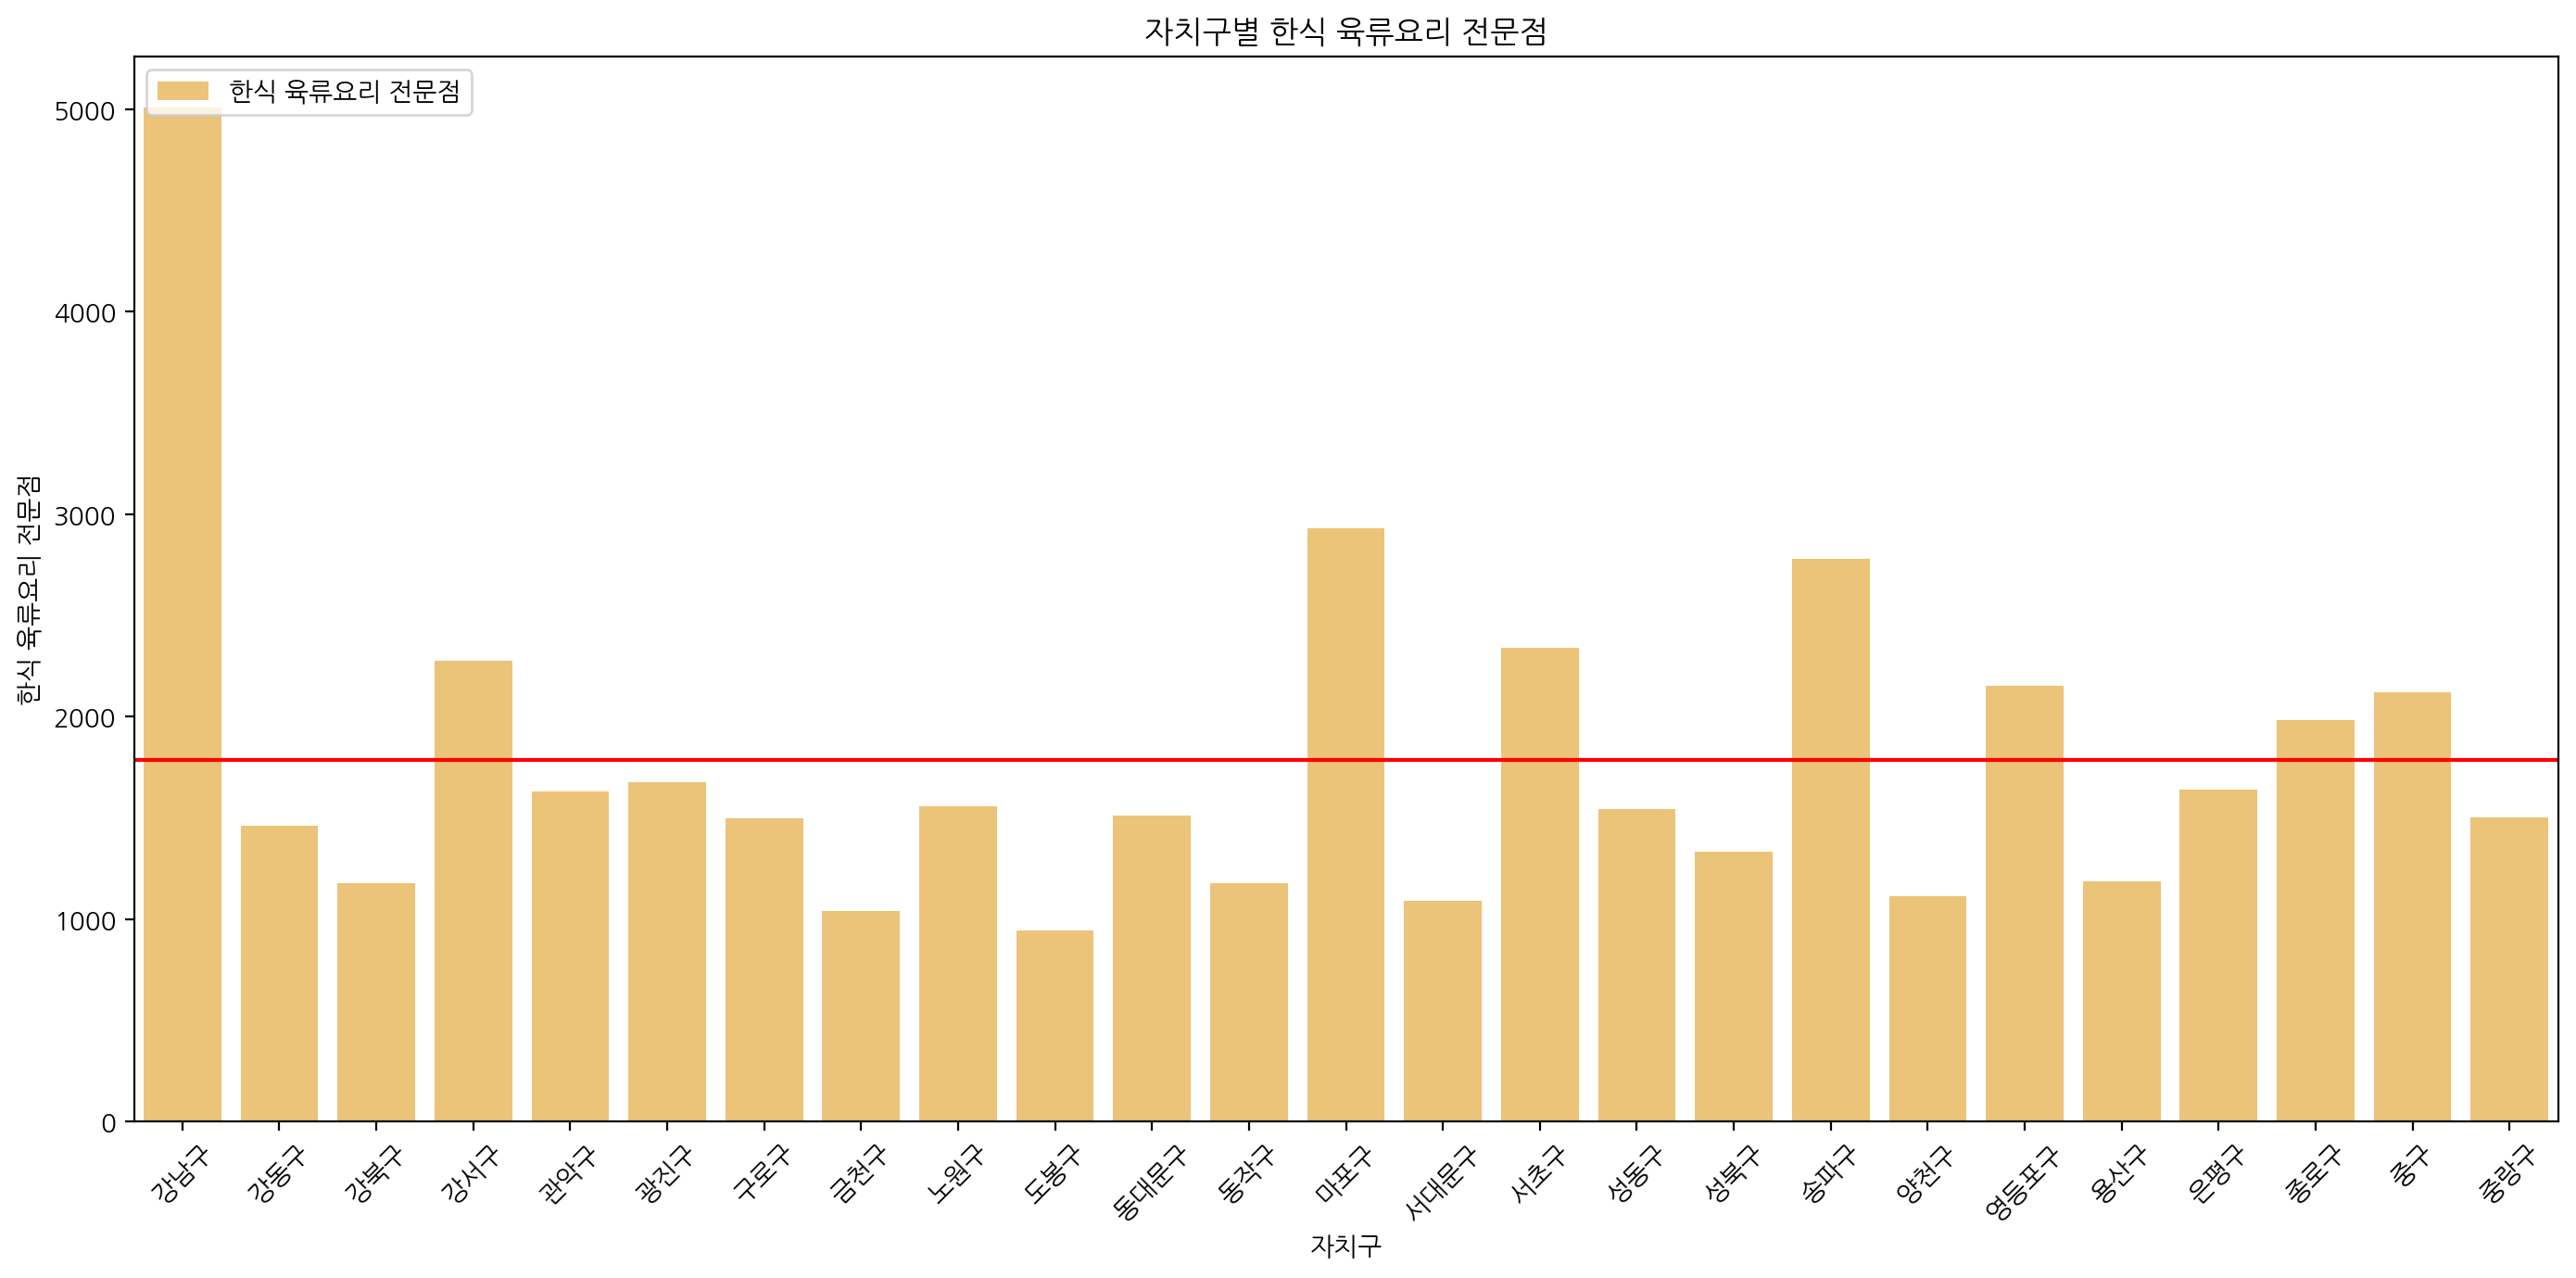

In [648]:
# 자치구별 한식 육류요리 전문점 그래프
print_sol_graph('한식 육류요리 전문점')

### 분석2
* 한식 육류요리 전문점이 많으면 노선수가 많다.
* 그러므로, 한식 육류요리 전문점이 많고 노선이 적은 곳에 추가하는 것이 타당하다
* 따라서, 강남구, 강동구, 강서구, 송파구, 광진구에 노선을 추가해야한다.

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

### **광진**

### 결론2: 그 이유는 무엇인가요?

#### 가설 검증에서
* 가설1~6에 따라 총 2개의 결론을 도출하였다.
* 결론 1은 택시운송업이 많은 곳은 노선수가 적고 따라서 수요가 적다.
  -> 즉, 택시운송업이 적고 상대적으로 노선수가 적은곳에 추가하는 것이 타당하다.
* 결론 2은 한식 육류요리 전문점이 많은 곳은 노선수가 많고 따라서 수요가 크다.
  -> 즉, 한식 육류요리 전문점이 많고 상대적으로 노선수가 적은곳에 추가하는 것이 타당하다. 
* 결론 1, 결론 2에 따라서 남은 곳은 광진구 하나이다.


####  도메인에서
* 광진구의 도로 교통 혼잡도가 매우 크다.
* 광진구의 입지는 교통 혼잡 지역(송파, 강남)